# Import Libraries

In [292]:
import pandas as pd

# Load Source Data

In [293]:
src_games = pd.read_csv('../data/source_data/games.csv')
src_turns = pd.read_csv('../data/source_data/turns.csv')
src_train = pd.read_csv('../data/source_data/train.csv')
src_test = pd.read_csv('../data/source_data/test.csv')

In [294]:
src_games.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,08/26/2022 3:38,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,08/10/2022 19:19,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,09/04/2022 8:04,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,09/12/2022 2:36,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,09/06/2022 4:31,NWL20,1200,0,CASUAL,1,642.688722


In [295]:
src_turns.head(30)

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play
5,1,6,stevy,EEOORSX,M11,OXO,31,65,Play
6,1,7,BetterBot,AAEJRSU,5E,RAJAS,29,83,Play
7,1,8,stevy,AEEFIRS,9B,FAERIES,72,137,Play
8,1,9,BetterBot,ELNNORU,C3,NEURON.L,68,151,Play
9,1,10,stevy,EEEHIKO,6F,HO,35,172,Play


In [296]:
src_train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [297]:
src_test.head()

,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


# Clean Train Dataset - I want every game to be represent by one line

In [298]:
# I get this information from woogles.io and summarise into dictionary
bots_and_scores = {'BetterBot': 268240632, 'STEEBot': 276067680, 'HastyBot': 588506671}

# Sort bots according score to define difficulity of a bot
bots_and_scores = dict(sorted(bots_and_scores.items(), key=lambda item: item[1]))

bots_and_scores

{'BetterBot': 268240632, 'STEEBot': 276067680, 'HastyBot': 588506671}

In [299]:
# First split train dataset into human players and bot players
user_df = src_train[~src_train["nickname"].isin(bots_and_scores.keys())] 
user_df = user_df.rename(
    columns={"nickname": "user_name", "score": "user_score", "rating": "user_rating"}
) 

bot_df = src_train[src_train["nickname"].isin(bots_and_scores.keys())]
bot_df = bot_df.rename(
    columns={"nickname": "bot_name", "score": "bot_score", "rating": "bot_rating"}
)

display(user_df.head())
display(bot_df.head())

,game_id,user_name,user_score,user_rating
1,1,stevy,429,1500
2,3,davidavid,440,1811
4,4,Inandoutworker,119,1473
6,5,stevy,325,1500
8,6,HivinD,378,2029


,game_id,bot_name,bot_score,bot_rating
0,1,BetterBot,335,1637
3,3,BetterBot,318,2071
5,4,BetterBot,478,1936
7,5,STEEBot,427,1844
9,6,STEEBot,427,2143


In [300]:
train = pd.merge(bot_df, user_df, on="game_id")

In [301]:
print("Source train.csv:")
display(src_train.head())

print("\nAfter merged bot and human player to one line:")
display(train.head())

Source train.csv:


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473



After merged bot and human player to one line:


,game_id,bot_name,bot_score,bot_rating,user_name,user_score,user_rating
0,1,BetterBot,335,1637,stevy,429,1500
1,3,BetterBot,318,2071,davidavid,440,1811
2,4,BetterBot,478,1936,Inandoutworker,119,1473
3,5,STEEBot,427,1844,stevy,325,1500
4,6,STEEBot,427,2143,HivinD,378,2029


# Save main df (train & test concat - will help with feature engieneer for games and turns datasets)

In [302]:
brief_df = pd.concat([src_train, src_test], axis=0)
brief_df = brief_df.sort_values(["game_id"])

full_user_df = brief_df[~brief_df["nickname"].isin(bots_and_scores.keys())] 
full_user_df = full_user_df.rename(
    columns={"nickname": "user_name", "score": "user_score", "rating": "user_rating"}
) 

full_bot_df = brief_df[brief_df["nickname"].isin(bots_and_scores.keys())]
full_bot_df = full_bot_df.rename(
    columns={"nickname": "bot_name", "score": "bot_score", "rating": "bot_rating"}
)

main_df = pd.merge(full_bot_df, full_user_df, on="game_id")

print("train & test concat main df:")
main_df.head()

train & test concat main df:


,game_id,bot_name,bot_score,bot_rating,user_name,user_score,user_rating
0,1,BetterBot,335,1637.0,stevy,429,1500.0
1,2,BetterBot,401,2000.0,Super,488,NaN
2,3,BetterBot,318,2071.0,davidavid,440,1811.0
3,4,BetterBot,478,1936.0,Inandoutworker,119,1473.0
4,5,STEEBot,427,1844.0,stevy,325,1500.0


# Games - Feature Engineer 1

### Add bot difficulity column (1 - Low Difficulity, 2 - Medium, 3 - High)

In [303]:
def score_to_difficulty(score):
    if score == max(bots_and_scores.values()):
        return 3  # High difficulty
    elif score == min(bots_and_scores.values()):
        return 1  # Low difficulty
    else:
        return 2  # Medium difficulty

bots_difficulty = {bot: score_to_difficulty(score) for bot, score in bots_and_scores.items()}

bots_difficulty

{'BetterBot': 1, 'STEEBot': 2, 'HastyBot': 3}

In [304]:
merged_df = src_games.merge(main_df, on='game_id', how='left')
games = src_games.copy()
games['bot_dificulity'] = merged_df['bot_name'].map(bots_difficulty)

In [305]:
print("Source games.csv:")
display(src_games.head())

print("\ngames with new feature (bot_difficulty):")
display(games.head())

Source games.csv:


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,08/26/2022 3:38,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,08/10/2022 19:19,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,09/04/2022 8:04,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,09/12/2022 2:36,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,09/06/2022 4:31,NWL20,1200,0,CASUAL,1,642.688722



games with new feature (bot_difficulty):


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,bot_dificulity
0,1,BetterBot,regular,STANDARD,1,08/26/2022 3:38,NWL20,1200,0,CASUAL,1,674.844274,1
1,2,Super,regular,STANDARD,1,08/10/2022 19:19,CSW21,3600,0,RATED,1,364.214418,1
2,3,BetterBot,regular,STANDARD,1,09/04/2022 8:04,CSW21,900,0,RATED,5,492.268262,1
3,4,BetterBot,regular,RESIGNED,0,09/12/2022 2:36,CSW21,3600,0,CASUAL,1,350.861141,1
4,5,STEEBot,regular,STANDARD,0,09/06/2022 4:31,NWL20,1200,0,CASUAL,1,642.688722,2


# Turns - Feature Engineer 1

### Add rack_len feature to turns.csv

In [306]:
turns = src_turns.copy()
turns["rack_len"] = turns["rack"].str.len()

display(turns.head())

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,rack_len
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play,7.0
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play,7.0
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play,7.0
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play,7.0
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play,7.0


### Add rack_usage feature to turns.csv

In [307]:
turns["rack_usage"] = turns["move"].str.len() / turns["rack_len"]
turns["rack_usage"] = turns.rack_usage.fillna(0)
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,rack_len,rack_usage
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play,7.0,0.428571
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play,7.0,0.428571
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play,7.0,0.571429
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play,7.0,0.285714
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play,7.0,1.142857


# Train - Feature Engineer 1

### add mean_rack_usage to train.csv - the mean rack usage of a player in a game in the total turns

In [308]:
# caclulate mean_rack_usage for every player
mean_rack_usage = turns.groupby(['game_id', 'nickname'])['rack_usage'].mean().reset_index()

# split between human users and bot users
user_mean_rack_usage = mean_rack_usage[~mean_rack_usage["nickname"].isin(bots_and_scores.keys())]
bot_mean_rack_usage = mean_rack_usage[mean_rack_usage["nickname"].isin(bots_and_scores.keys())]
user_mean_rack_usage.rename(columns={'rack_usage': 'user_mean_rack_usage', 'nickname': 'user_name'}, inplace=True)
bot_mean_rack_usage.rename(columns={'rack_usage': 'bot_mean_rack_usage', 'nickname': 'bot_name'}, inplace=True)

# print results
print("users:")
display(user_mean_rack_usage.head())
print("\nbots:")
display(bot_mean_rack_usage.head())

users:


C:\Users\liavm\AppData\Local\Temp\ipykernel_21904\60958221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_mean_rack_usage.rename(columns={'rack_usage': 'user_mean_rack_usage', 'nickname': 'user_name'}, inplace=True)
C:\Users\liavm\AppData\Local\Temp\ipykernel_21904\60958221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_mean_rack_usage.rename(columns={'rack_usage': 'bot_mean_rack_usage', 'nickname': 'bot_name'}, inplace=True)


,game_id,user_name,user_mean_rack_usage
1,1,stevy,0.573469
3,2,Super,0.591837
5,3,davidavid,0.591837
7,4,Inandoutworker,0.418367
9,5,stevy,0.511161



bots:


,game_id,bot_name,bot_mean_rack_usage
0,1,BetterBot,0.700549
2,2,BetterBot,0.761905
4,3,BetterBot,0.626374
6,4,BetterBot,0.723810
8,5,STEEBot,0.659524


In [309]:
# Merge user_mean_rack_usage and bot_mean_rack_usage with train
train_with_user = train.merge(user_mean_rack_usage, on=['game_id', 'user_name'], how='left')
train_with_bot = train_with_user.merge(bot_mean_rack_usage, on=['game_id', 'bot_name'], how='left')

# Reorder columns
columns_order = [
    'game_id', 'bot_name', 'bot_score', 'bot_mean_rack_usage', 'bot_rating',
    'user_name', 'user_score', 'user_mean_rack_usage', 'user_rating'
]
train_reordered = train_with_bot[columns_order]

# Print Results
print("train before:")
display(train.head())
print("\ntrain after:")
display(train_reordered.head())

train before:


,game_id,bot_name,bot_score,bot_rating,user_name,user_score,user_rating
0,1,BetterBot,335,1637,stevy,429,1500
1,3,BetterBot,318,2071,davidavid,440,1811
2,4,BetterBot,478,1936,Inandoutworker,119,1473
3,5,STEEBot,427,1844,stevy,325,1500
4,6,STEEBot,427,2143,HivinD,378,2029



train after:


,game_id,bot_name,bot_score,bot_mean_rack_usage,bot_rating,user_name,user_score,user_mean_rack_usage,user_rating
0,1,BetterBot,335,0.700549,1637,stevy,429,0.573469,1500
1,3,BetterBot,318,0.626374,2071,davidavid,440,0.591837,1811
2,4,BetterBot,478,0.723810,1936,Inandoutworker,119,0.418367,1473
3,5,STEEBot,427,0.659524,1844,stevy,325,0.511161,1500
4,6,STEEBot,427,0.934066,2143,HivinD,378,0.678571,2029


In [310]:
train = train_reordered

# Turns - Feature Engineer 2

## Letter Score Feature

In [311]:
letter_points = {
    1: "AEILNORSTU",  # Letters worth 1 point
    2: "DG",          # Letters worth 2 points
    3: "BCMP",        # Letters worth 3 points
    4: "FHVWY",       # Letters worth 4 points
    5: "K",           # Letters worth 5 points
    8: "JX",          # Letters worth 8 points
    10: "QZ"          # Letters worth 10 points
}

In [312]:
letter_to_points = {letter: points for points, letters in letter_points.items() for letter in letters}

def calculate_word_score(word):
    if isinstance(word, str):  
        return sum(letter_to_points.get(letter.upper(), 0) for letter in word)
    return 0 

In [313]:
turns['letter_score'] = turns['move'].apply(calculate_word_score)
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,rack_len,rack_usage,letter_score
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play,7.0,0.428571,5
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play,7.0,0.428571,8
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play,7.0,0.571429,4
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play,7.0,0.285714,4
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play,7.0,1.142857,9


## Average Letter Score Feature

### Create the feature

In [314]:
turns["average_letter_score"] = turns.letter_score / turns.move.str.len()
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,rack_len,rack_usage,letter_score,average_letter_score
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play,7.0,0.428571,5,1.666667
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play,7.0,0.428571,8,2.666667
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play,7.0,0.571429,4,1.000000
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play,7.0,0.285714,4,2.000000
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play,7.0,1.142857,9,1.125000


### Research on average letter score behaivor of any different rated player

In [315]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import random

In [316]:
train_sorted = train.sort_values(by="user_rating", ascending=False)
top_5_best_users = train_sorted["user_name"].drop_duplicates().iloc[:5].tolist()
top_5_worst_users = train_sorted["user_name"].drop_duplicates().iloc[-5:].tolist()

In [317]:
def get_random_game_id(user_name, turns_df):
    unique_game_ids = turns_df[turns_df["nickname"] == user_name]["game_id"].unique()
    if len(unique_game_ids) > 0:
        return random.choice(unique_game_ids)
    return None

In [318]:
selected_games = []
for user in top_5_best_users + top_5_worst_users:
    game_id = get_random_game_id(user, turns)
    if game_id:
        selected_games.append((user, game_id))
selected_games

[('Pasindu', 19257),
 ('TKC', 70561),
 ('LIMEUJIE', 11793),
 ('earth', 18871),
 ('AWFUL', 14963),
 ('Mzine', 15050),
 ('isaac2', 66648),
 ('aqilfattah', 41079),
 ('Saadkhan', 30758),
 ('fawzah', 49014)]

In [319]:
filtered_selected_games = selected_games[:5]
filtered_selected_games

[('Pasindu', 19257),
 ('TKC', 70561),
 ('LIMEUJIE', 11793),
 ('earth', 18871),
 ('AWFUL', 14963)]

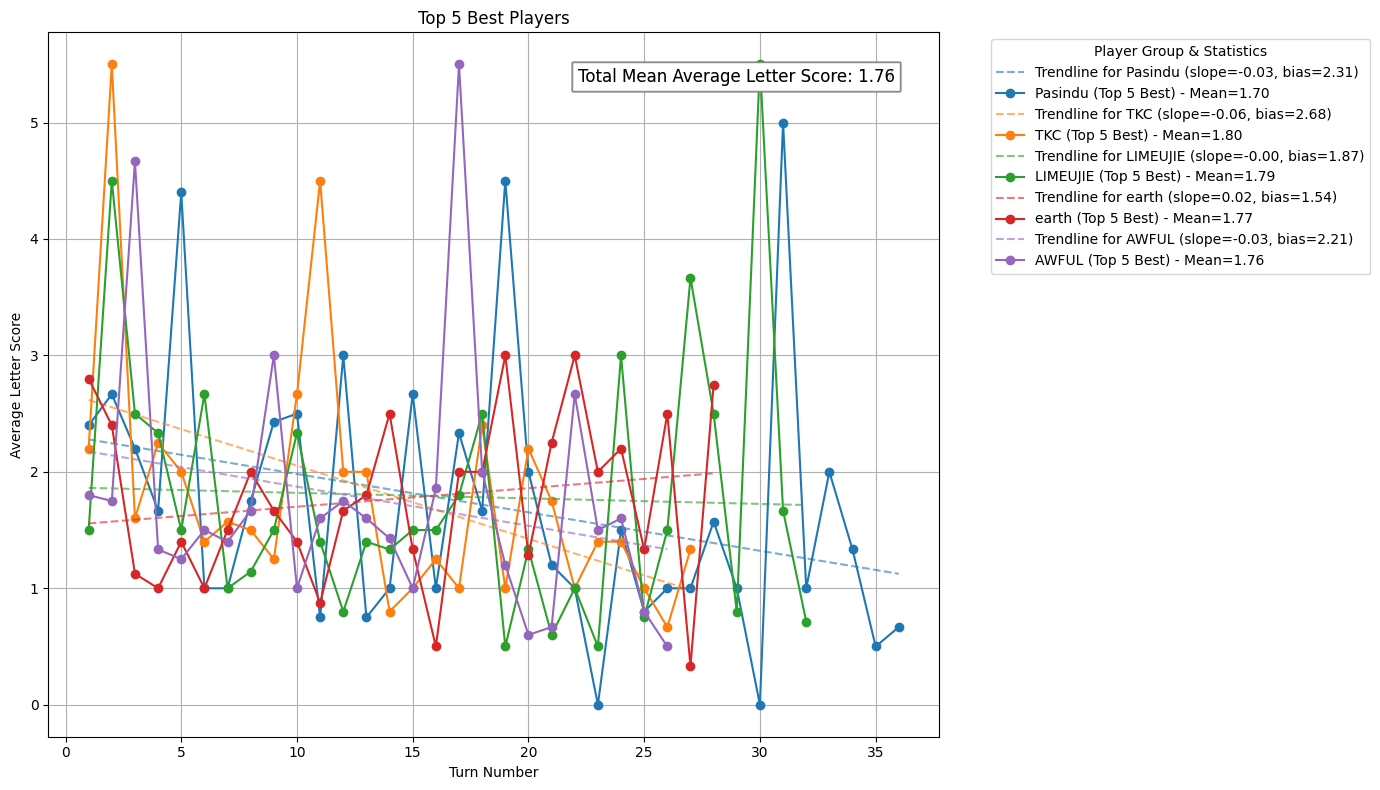

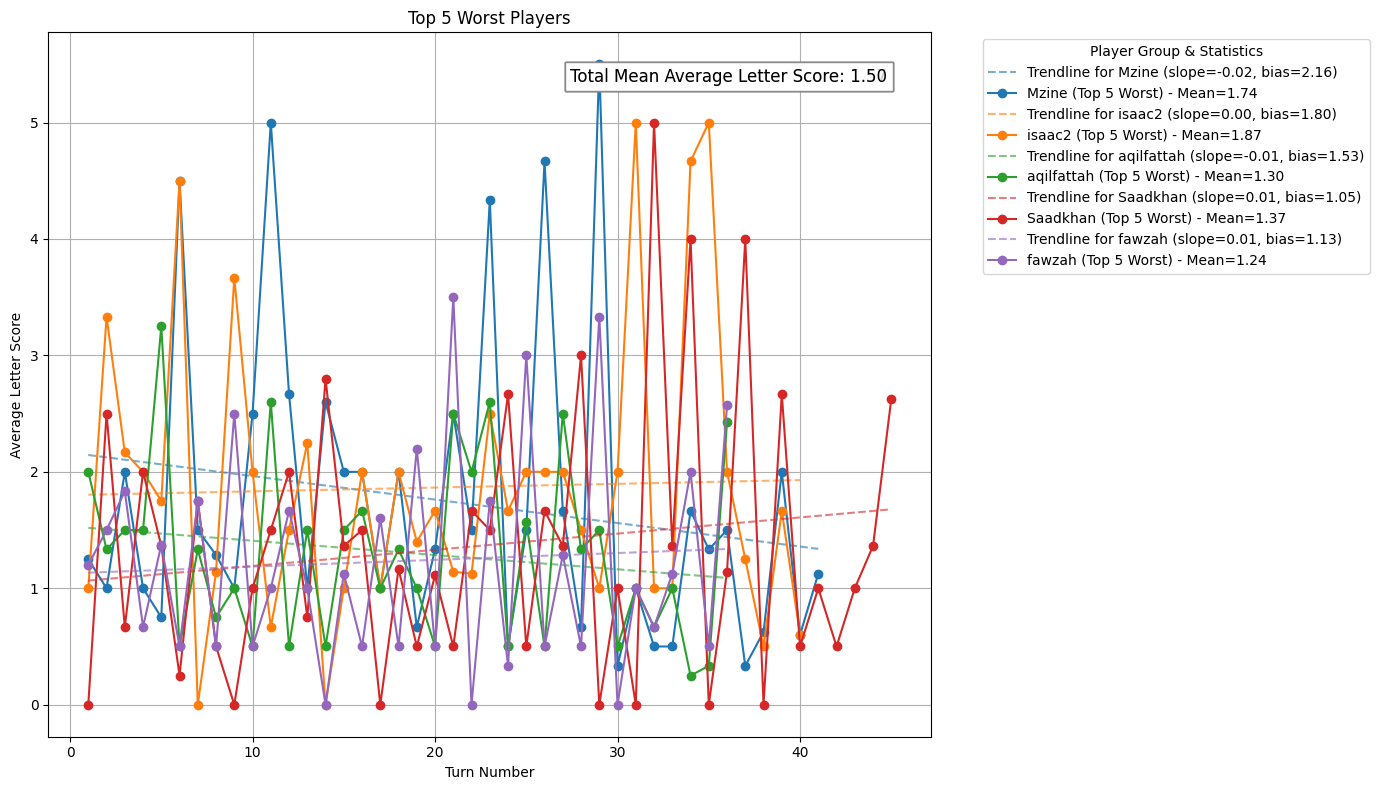

In [320]:
def plot_avergae_letter_score_during_game(selected_games, title="Average Letter Score During Selected Games"):
    plt.figure(figsize=(14, 8))
    colors = plt.cm.tab10.colors  
    all_mean_scores = [] 
    
    for i, (user, game_id) in enumerate(selected_games):
        user_turns = turns[turns["game_id"] == game_id]
        turn_numbers = user_turns["turn_number"]
        avg_scores = user_turns["average_letter_score"]

        # Calculate Mean
        mean_score = avg_scores.mean()
        all_mean_scores.append(mean_score)

        # Calculate Trendline (Linear Regression)
        slope, intercept, _, _, _ = linregress(turn_numbers, avg_scores)
        trendline = slope * turn_numbers + intercept

        # Plot the trendline
        plt.plot(
            turn_numbers,
            trendline,
            linestyle="--",
            color=colors[i % len(colors)],
            alpha=0.6,
            label=f"Trendline for {user} (slope={slope:.2f}, bias={intercept:.2f})"
        )
        
        # Plot the player's average letter score
        plt.plot(
            turn_numbers,
            avg_scores,
            label=f"{user} ({'Top 5 Best' if user in top_5_best_users else 'Top 5 Worst'}) - Mean={mean_score:.2f}",
            color=colors[i % len(colors)],
            marker="o"
        )
        
        # Calculate and display the total mean of all players
        total_mean_score = np.mean(all_mean_scores)
        plt.text(
            0.95, 0.95, f"Total Mean Average Letter Score: {total_mean_score:.2f}",
            horizontalalignment='right',
            verticalalignment='top',
            transform=plt.gca().transAxes,
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
        )
    
    # Customize the plot
    plt.title(title)
    plt.xlabel("Turn Number")
    plt.ylabel("Average Letter Score")
    plt.legend(title="Player Group & Statistics", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_avergae_letter_score_during_game(selected_games[:5], title="Top 5 Best Players")
plot_avergae_letter_score_during_game(selected_games[5:], title="Top 5 Worst Players")

I conclude that higher ranked players tend to use words made up of more expensive letters.

# Train - Feature Engineer 2

## Mean Average Letter Score - Feature

In [321]:
mean_avg_letter_score = (
    turns.groupby(["game_id", "nickname"])["average_letter_score"]
    .mean()
    .reset_index()
    .rename(columns={"average_letter_score": "mean_average_letter_score"})
)

mean_avg_letter_score.head()

,game_id,nickname,mean_average_letter_score
0,1,BetterBot,2.045055
1,1,stevy,1.636905
2,2,BetterBot,1.739385
3,2,Super,1.843707
4,3,BetterBot,1.925183


In [322]:
# Merge the calculated feature into the train dataset
train = train.merge(
    mean_avg_letter_score, 
    left_on=["game_id", "user_name"], 
    right_on=["game_id", "nickname"], 
    how="left"
)

# Drop the redundant "nickname" column after merging
train = train.drop(columns=["nickname"])

# Rearrange columns to ensure `user_rating` is the last column
columns = [
    "game_id",
    "bot_name",
    "bot_score",
    "bot_mean_rack_usage",
    "bot_rating",
    "user_name",
    "user_score",
    "user_mean_rack_usage",
    "mean_average_letter_score", 
    "user_rating"  
]

# Reorder the train DataFrame
train = train[columns]

In [323]:
train.head()

,game_id,bot_name,bot_score,bot_mean_rack_usage,bot_rating,user_name,user_score,user_mean_rack_usage,mean_average_letter_score,user_rating
0,1,BetterBot,335,0.700549,1637,stevy,429,0.573469,1.636905,1500
1,3,BetterBot,318,0.626374,2071,davidavid,440,0.591837,1.951531,1811
2,4,BetterBot,478,0.723810,1936,Inandoutworker,119,0.418367,1.202381,1473
3,5,STEEBot,427,0.659524,1844,stevy,325,0.511161,2.300000,1500
4,6,STEEBot,427,0.934066,2143,HivinD,378,0.678571,1.655556,2029


# Sorted train & game by user_rating

In [332]:
sorted_train = train.sort_values(by="user_rating", ascending=False)
sorted_main = main_df.sort_values(by="user_rating", ascending=False)
sorted_games = games.set_index("game_id").loc[sorted_main["game_id"]].reset_index()

In [333]:
sorted_train.head()

,game_id,bot_name,bot_score,bot_mean_rack_usage,bot_rating,user_name,user_score,user_mean_rack_usage,mean_average_letter_score,user_rating
15928,22940,BetterBot,461,0.819048,1849,Pasindu,303,0.423077,2.070513,2510
11505,16524,BetterBot,447,0.617560,1849,Pasindu,312,0.418367,2.047619,2510
26162,37753,BetterBot,437,0.623810,1849,Pasindu,276,0.520408,1.602381,2510
889,1327,BetterBot,347,0.642857,1849,Pasindu,393,0.510204,1.747619,2510
30636,44188,BetterBot,455,0.638095,1849,Pasindu,267,0.521008,1.653922,2510


In [334]:
sorted_games.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,bot_dificulity
0,22940,BetterBot,blitz,STANDARD,0,08/04/2022 10:19,CSW21,300,0,CASUAL,1,81.851667,1
1,16524,BetterBot,blitz,STANDARD,0,08/04/2022 11:25,CSW21,300,0,CASUAL,1,82.712095,1
2,37753,Pasindu,blitz,STANDARD,0,08/04/2022 10:23,CSW21,300,0,CASUAL,1,102.979352,1
3,1327,BetterBot,blitz,STANDARD,1,08/04/2022 10:25,CSW21,300,0,CASUAL,1,87.458146,1
4,44188,Pasindu,blitz,STANDARD,0,08/04/2022 10:20,CSW21,300,0,CASUAL,1,112.585403,1


# Look into Game dataset - try to realise which features are important

## Utills Methods

### Visualizes game's feature frequency for top `n` highest and lowest-rated players.

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

def games_features_distribution_over_two_edges(n: int, feature_name: str, feature_label: str) -> None:
    # Get the top n highest-rated players
    top_n_highest_games = sorted_games.head(n)
    
    # Get the top n lowest-rated players
    top_n_lowest_games = sorted_games.tail(n)

    # Count different values of the feature over two groups
    highest_feature_counts = top_n_highest_games[feature_name].value_counts()
    lowest_feature_counts = top_n_lowest_games[feature_name].value_counts()

    # Prepare data for highest group
    highest_data = highest_feature_counts.reset_index()
    highest_data.columns = [feature_name, "count"]
    
    # Prepare data for lowest group
    lowest_data = lowest_feature_counts.reset_index()
    lowest_data.columns = [feature_name, "count"]

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Plot for the top n highest-rated players
    sns.barplot(
        data=highest_data,
        x=feature_name,
        y="count",
        color="blue",
        alpha=0.7,
        ax=axes[0]
    )
    axes[0].set_title(f"Distribution of {feature_label} (Top {n} Highest Rated Players)")
    axes[0].set_xlabel(feature_label)
    axes[0].set_ylabel("Frequency")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis="y", linestyle="--", alpha=0.7)

    # Plot for the top n lowest-rated players
    sns.barplot(
        data=lowest_data,
        x=feature_name,
        y="count",
        color="orange",
        alpha=0.7,
        ax=axes[1]
    )
    axes[1].set_title(f"Distribution of {feature_label} (Top {n} Lowest Rated Players)")
    axes[1].set_xlabel(feature_label)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis="y", linestyle="--", alpha=0.7)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


## Investigate `initial_time_seconds` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

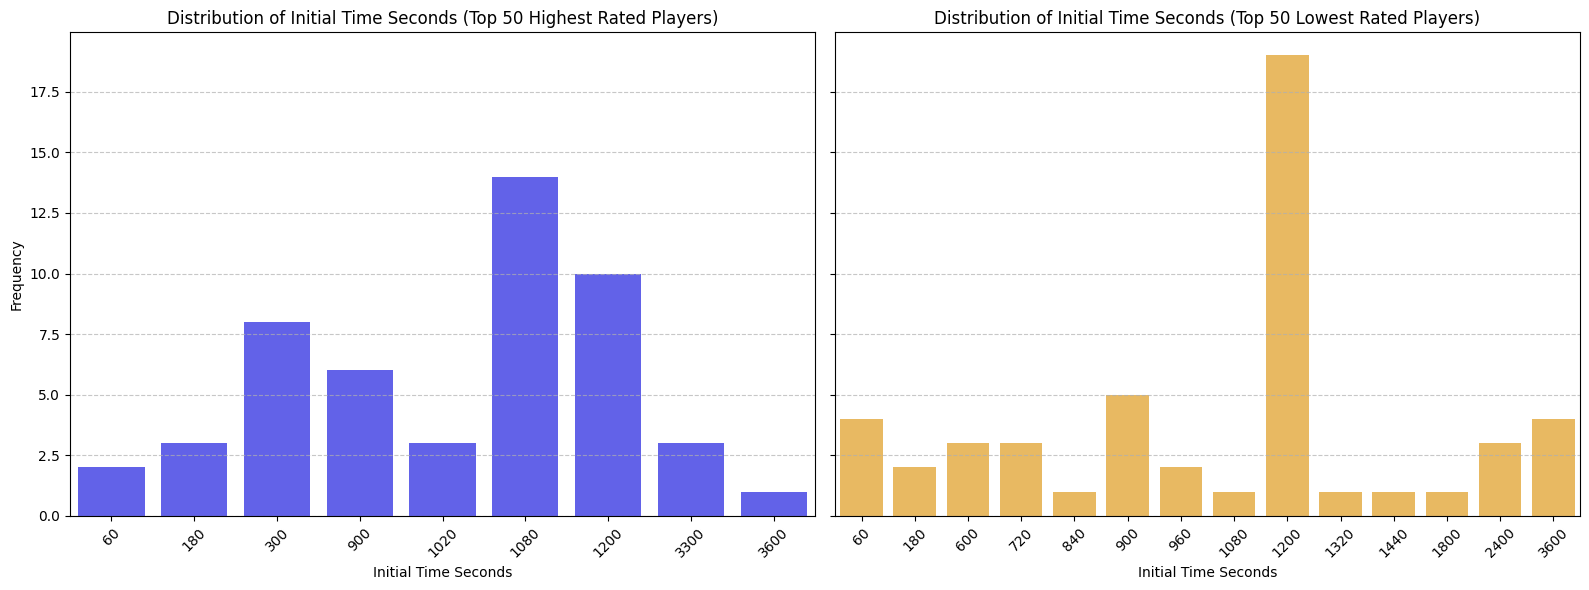

In [336]:
games_features_distribution_over_two_edges(n=50, feature_name="initial_time_seconds", feature_label="Initial Time Seconds")

### Results for top 100 highest and lowest-rated players.

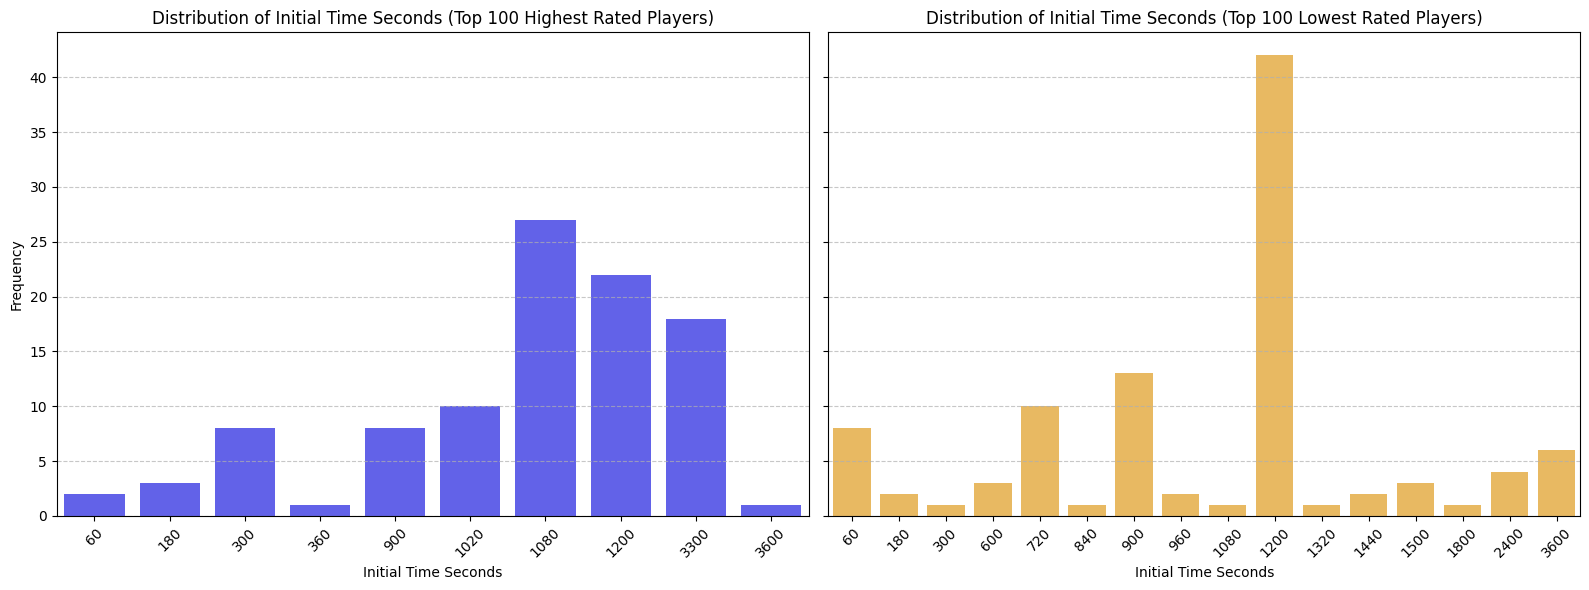

In [337]:
games_features_distribution_over_two_edges(n=100, feature_name="initial_time_seconds", feature_label="Initial Time Seconds")

### Results for top 300 highest and lowest-rated players.

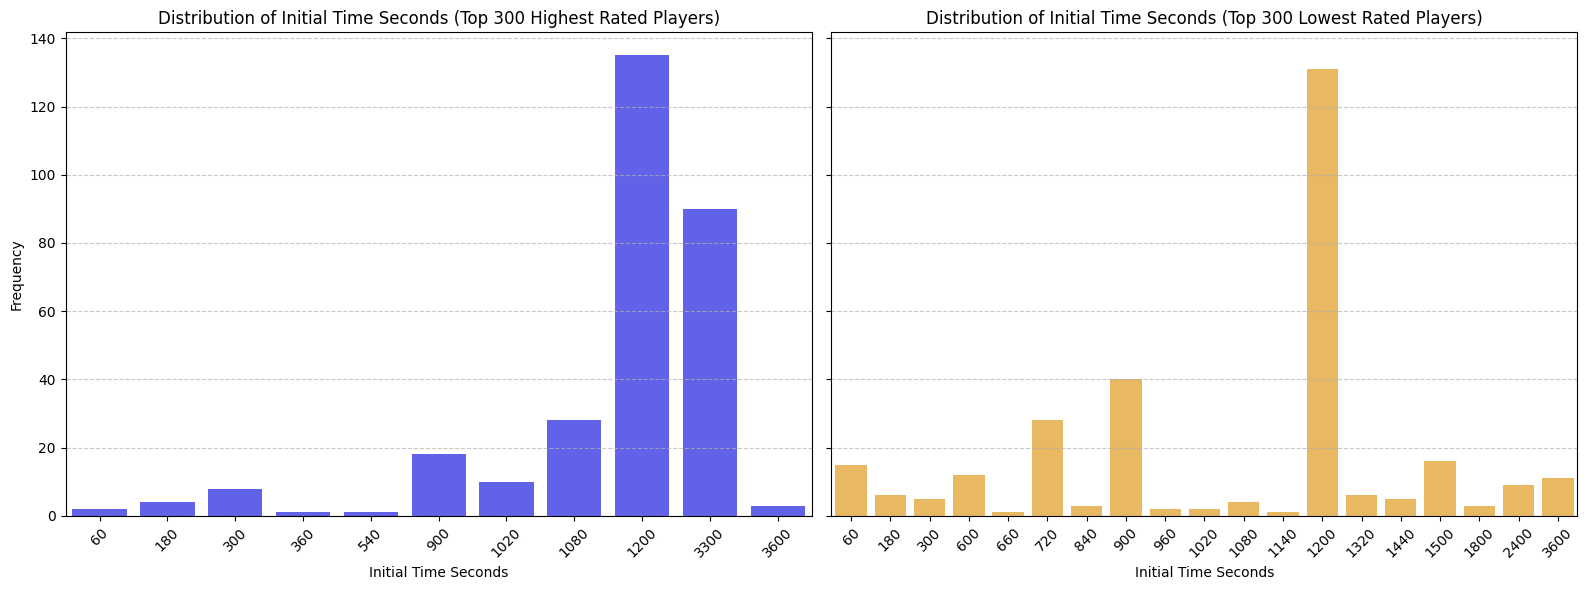

In [338]:
games_features_distribution_over_two_edges(n=300, feature_name="initial_time_seconds", feature_label="Initial Time Seconds")

### Results for top 514 highest and lowest-rated players.

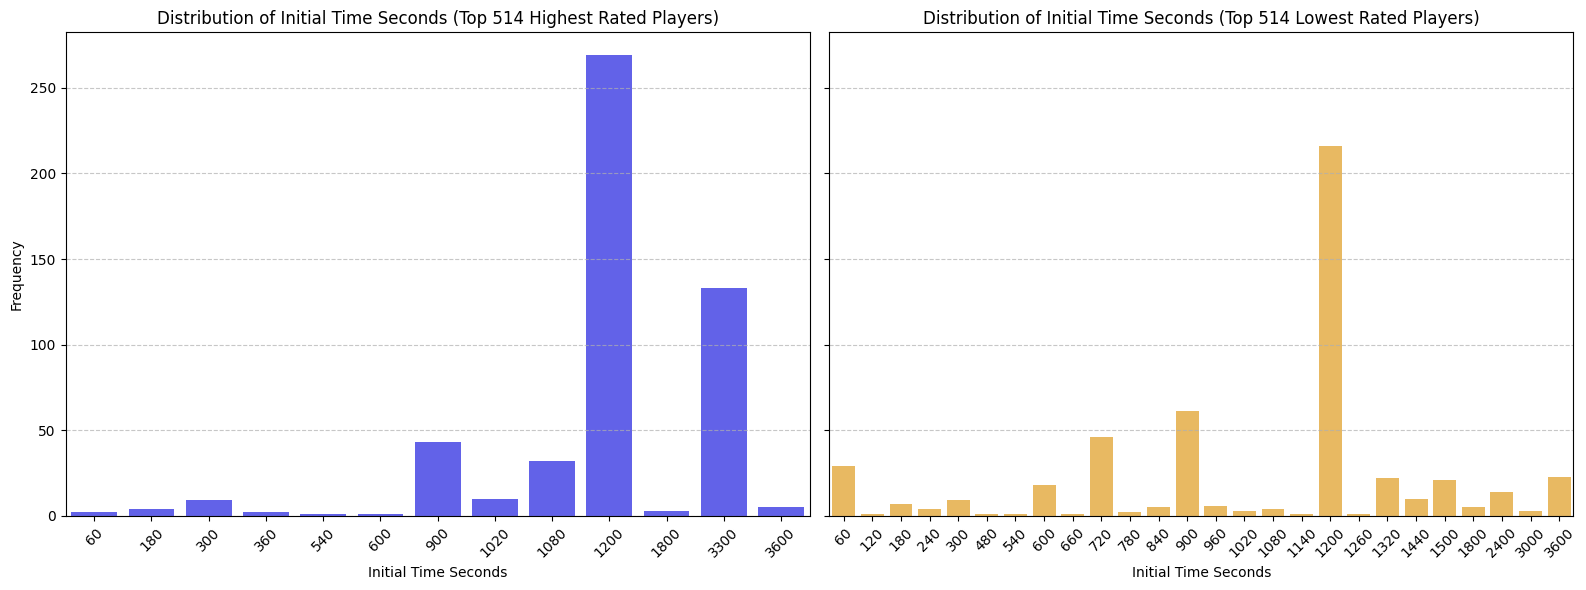

In [339]:
number_of_players =  train["user_name"].nunique()

games_features_distribution_over_two_edges(n=number_of_players // 2, feature_name="initial_time_seconds", feature_label="Initial Time Seconds")

### Check correlation of categorial feature represent intial time

In [340]:
# Define the default initial time
default_time = 1200

temp = games.copy()

# Engineer the categorical feature for initial_time_seconds
temp["time_category"] = temp["initial_time_seconds"].apply(
    lambda x: "Shorter" if x < default_time else "Default" if x == default_time else "Longer"
)

# Merge the `games` and `train` datasets to align `time_category` with `user_rating`
temp_df = pd.merge(main_df, temp[["game_id", "time_category"]], on="game_id", how="inner")

# Encode the categorical `time_category` feature into numerical values for correlation calculation
time_category_mapping = {"Shorter": 0, "Default": 1, "Longer": 2}
temp_df["time_category_encoded"] = temp_df["time_category"].map(time_category_mapping)

# Calculate the correlation between `time_category_encoded` and `user_rating`
pearson_correlation = temp_df["time_category_encoded"].corr(temp_df["user_rating"], method="pearson")

# Display the correlation result
print(f"Correlation between 'time_category' and 'user_rating': {pearson_correlation:.2f}")

Correlation between 'time_category' and 'user_rating': 0.27


### Conclustion

Numeric `initial_time_seconds` captures distinct player behaviors, such as high-ranked players favoring longer times and low-ranked players preferring shorter times. Retaining it preserves these nuances for the model to learn.

For Summary, I think intial_time_seconds is important and somehow has correlation to user rating, we can let the model learn the critical initial time. 
The `time_control_name` is a categorial feature represent the `initial_time_seconds` - this information not necessary.

## Investigate `game_end_reason` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

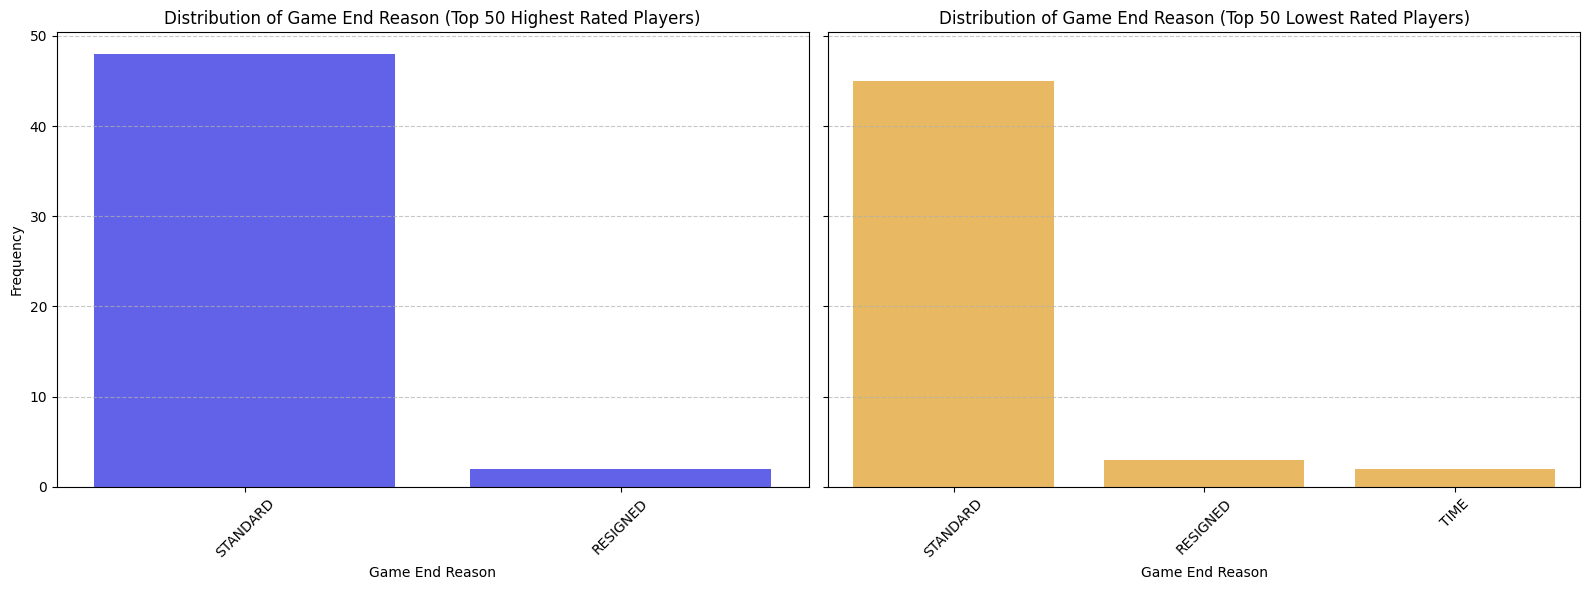

In [341]:
games_features_distribution_over_two_edges(n=50, feature_name="game_end_reason", feature_label="Game End Reason")

### Results for top 100 highest and lowest-rated players.

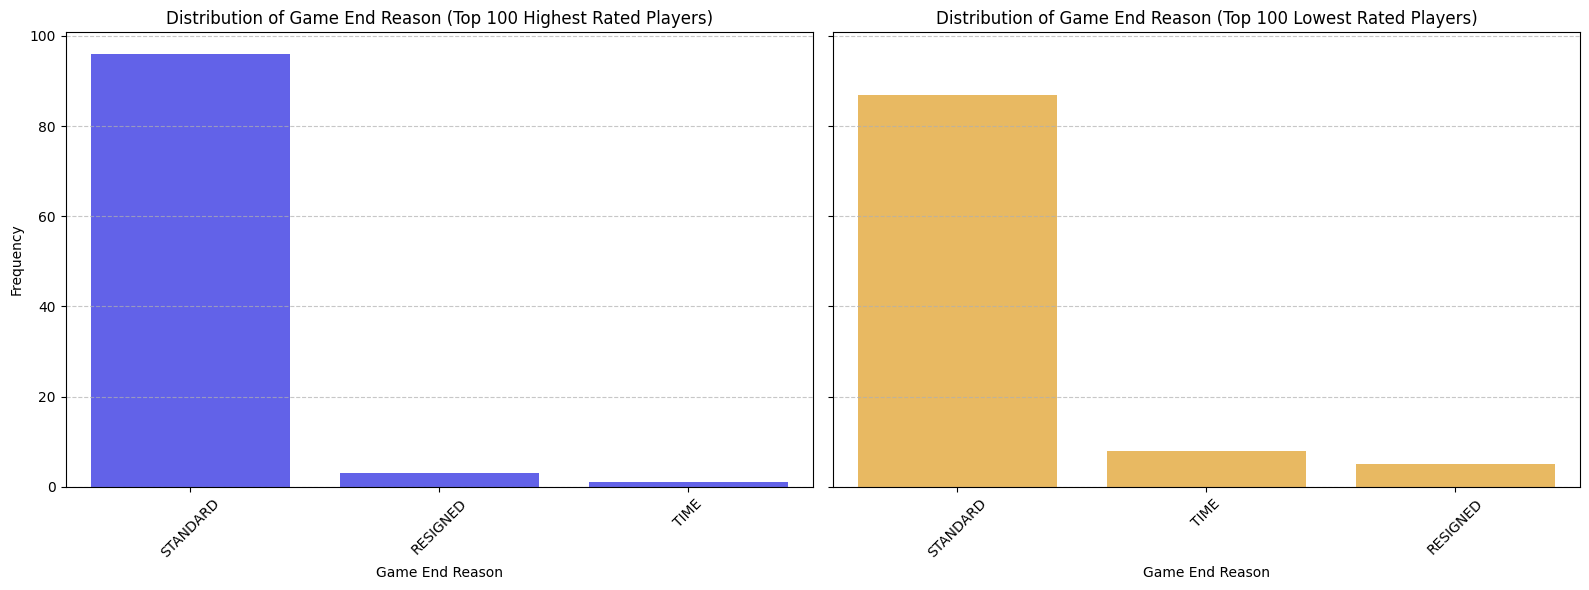

In [342]:
games_features_distribution_over_two_edges(n=100, feature_name="game_end_reason", feature_label="Game End Reason")

### Results for top 300 highest and lowest-rated players.

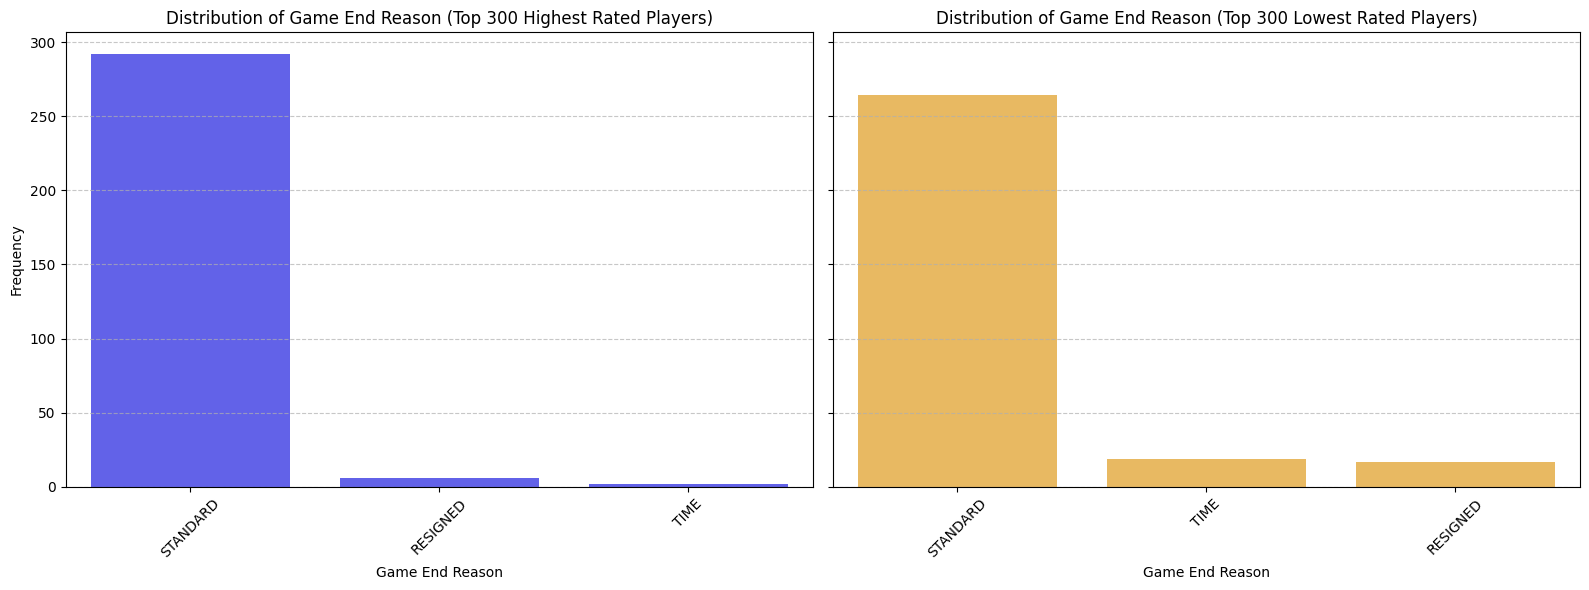

In [343]:
games_features_distribution_over_two_edges(n=300, feature_name="game_end_reason", feature_label="Game End Reason")

### Results for top 514 highest and lowest-rated players."

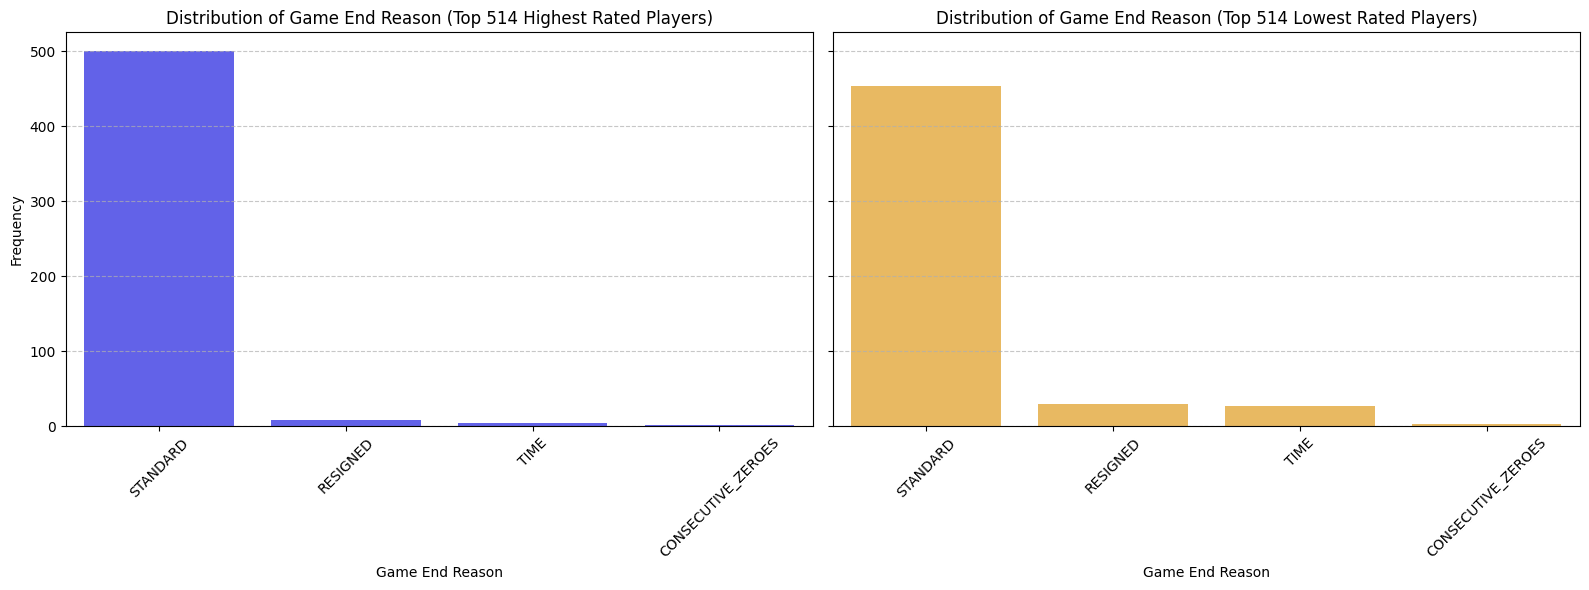

In [344]:
games_features_distribution_over_two_edges(n=514, feature_name="game_end_reason", feature_label="Game End Reason")

### Check correlation between `game_end_reason` feature to `user_rating`

In [366]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode the categorical game_end_reason feature to numeric values
label_encoder = LabelEncoder()
temp = src_games.copy()
temp["game_end_reason_encoded"] = label_encoder.fit_transform(temp["game_end_reason"])

# Merge the games dataset with the train dataset based on game_id
merged_df = main_df.merge(temp[["game_id", "game_end_reason_encoded"]], on="game_id", how="inner")

In [367]:
# Calculate the Pearson correlation
correlation = merged_df["game_end_reason_encoded"].corr(merged_df["user_rating"], method="pearson")
print(f"Correlation between game_end_reason and user_rating: {correlation:.2f}")

Correlation between game_end_reason and user_rating: 0.00


### Check correlation between `negative_end_reason` feature to `user_rating`

In [368]:
# Define negative reasons for game end
negative_reasons = ["Resigned", "Timeout"]

temp = src_games.copy()

# Create the binary feature negative_end_reason in the games dataset
temp["negative_end_reason"] = temp["game_end_reason"].isin(negative_reasons).astype(int)

# Merge the games dataset with the train dataset based on game_id
merged_df = main_df.merge(temp[["game_id", "negative_end_reason"]], on="game_id", how="inner")

In [369]:
# Calculate the Pearson correlation
correlation = merged_df["negative_end_reason"].corr(merged_df["user_rating"], method="pearson")
print(f"Correlation between negative_end_reason and user_rating: {correlation:.2f}")

Correlation between negative_end_reason and user_rating: nan


### Conclustion

Important Feature, lowe ranked player tend more to end their games by negetive way (Time, Resigned, etc..).
I think, we should encode this feature, and also create new binary feature of `negetive_end_reason`

## Investigate `lexicon` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

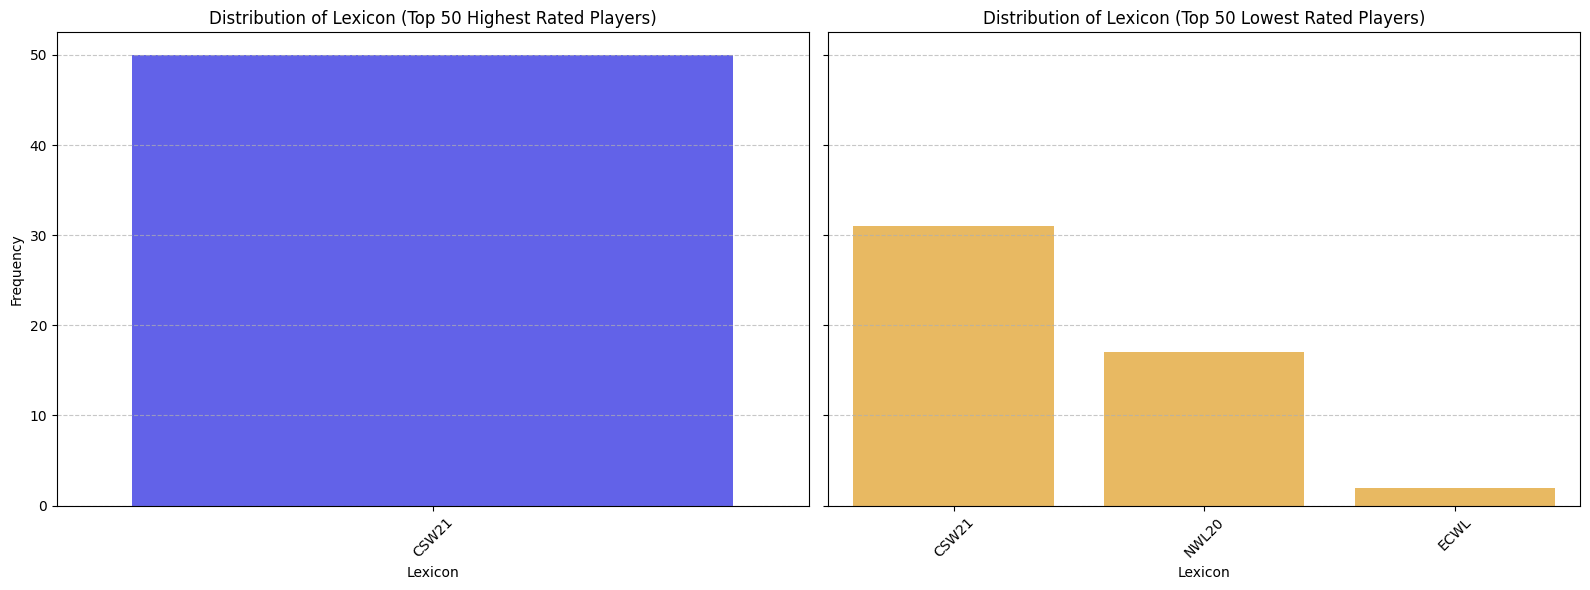

In [370]:
games_features_distribution_over_two_edges(n=50, feature_name="lexicon", feature_label="Lexicon")

### Results for top 100 highest and lowest-rated players.

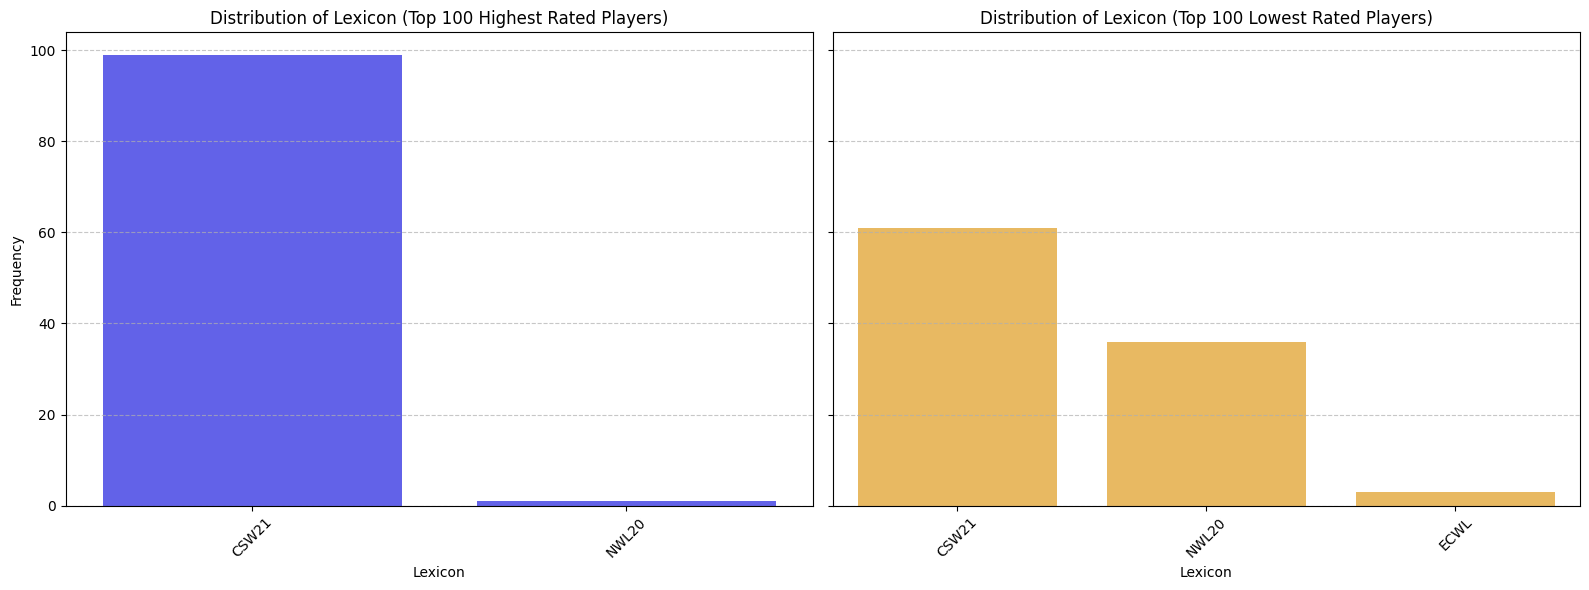

In [371]:
games_features_distribution_over_two_edges(n=100, feature_name="lexicon", feature_label="Lexicon")

### Results for top 300 highest and lowest-rated players.

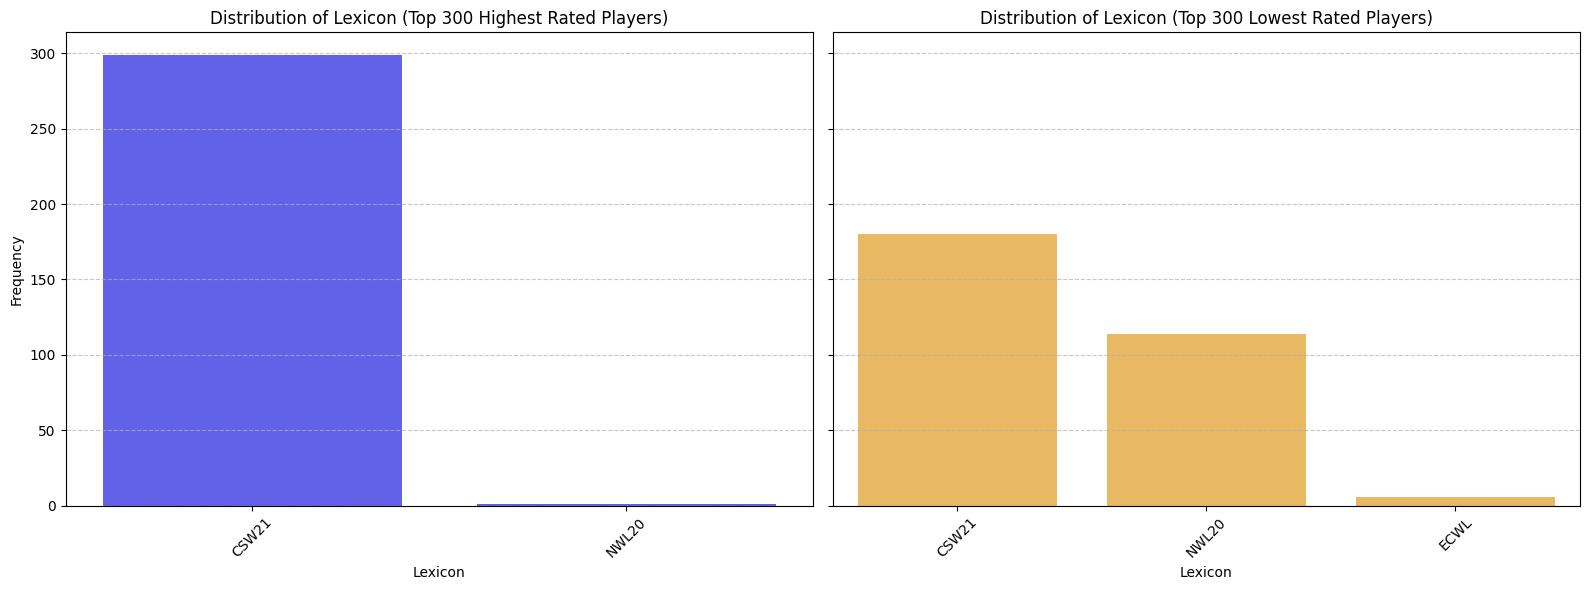

In [372]:
games_features_distribution_over_two_edges(n=300, feature_name="lexicon", feature_label="Lexicon")

### Results for top 514 highest and lowest-rated players.

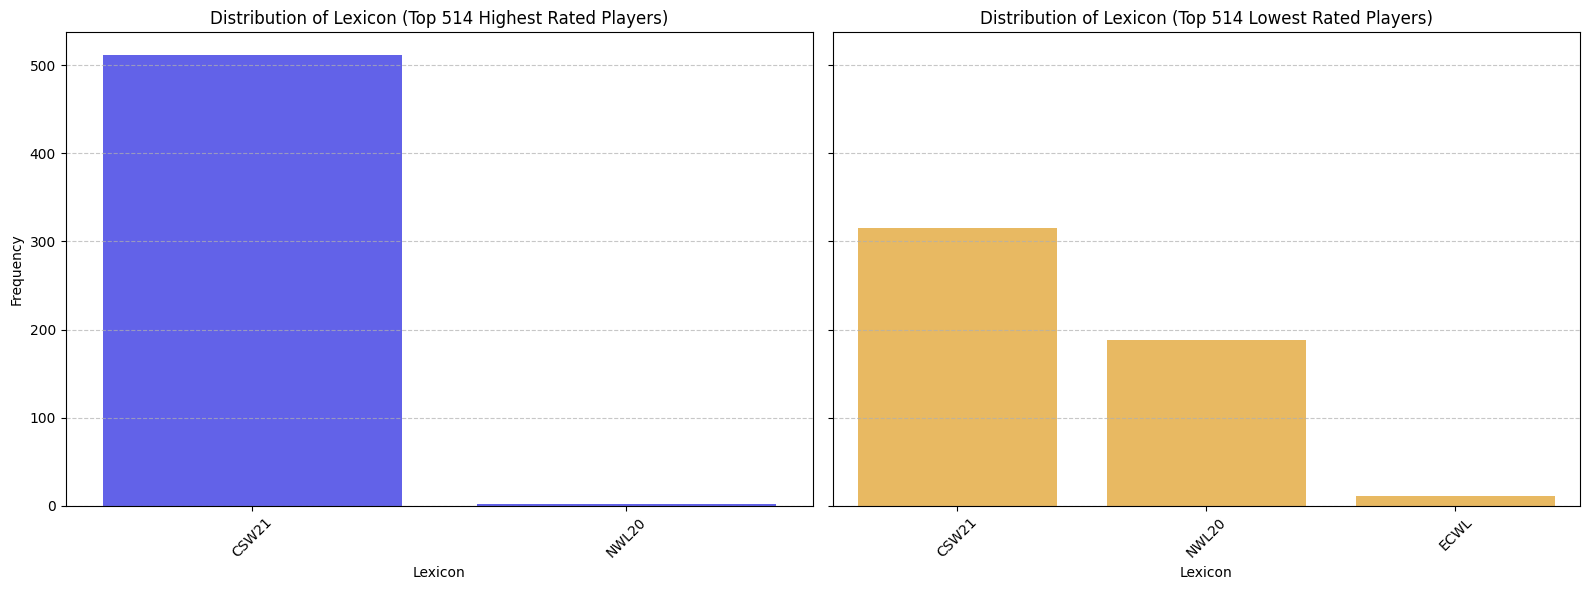

In [373]:
games_features_distribution_over_two_edges(n=514, feature_name="lexicon", feature_label="Lexicon")

### Check correlation between `lexicon` feature to `user_rating`

In [374]:
from sklearn.preprocessing import LabelEncoder

temp = src_games.copy()

# Encode the lexicon feature into numeric values
label_encoder = LabelEncoder()
temp["lexicon_encoded"] = label_encoder.fit_transform(temp["lexicon"])

# Merge the games dataset with the train dataset based on game_id
merged_df = main_df.merge(temp[["game_id", "lexicon_encoded"]], on="game_id", how="inner")

In [375]:
# Calculate the Pearson correlation
correlation = merged_df["lexicon_encoded"].corr(merged_df["user_rating"])
print(f"Correlation between lexicon and user_rating: {correlation:.2f}")

Correlation between lexicon and user_rating: -0.43


### Conclusion

The correlation between the `lexicon` feature and `user_rating` is **-0.43**, indicating a moderate negative relationship. This suggests that players with lower ratings are more likely to use different lexicons than higher-rated players. The negative correlation may reflect preferences or habits tied to skill levels, such as lower-rated players potentially selecting less common or default lexicons. This feature might be valuable for the prediction model, as it could help distinguish between player ratings based on their choice of lexicon.

## Investigate `winner` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

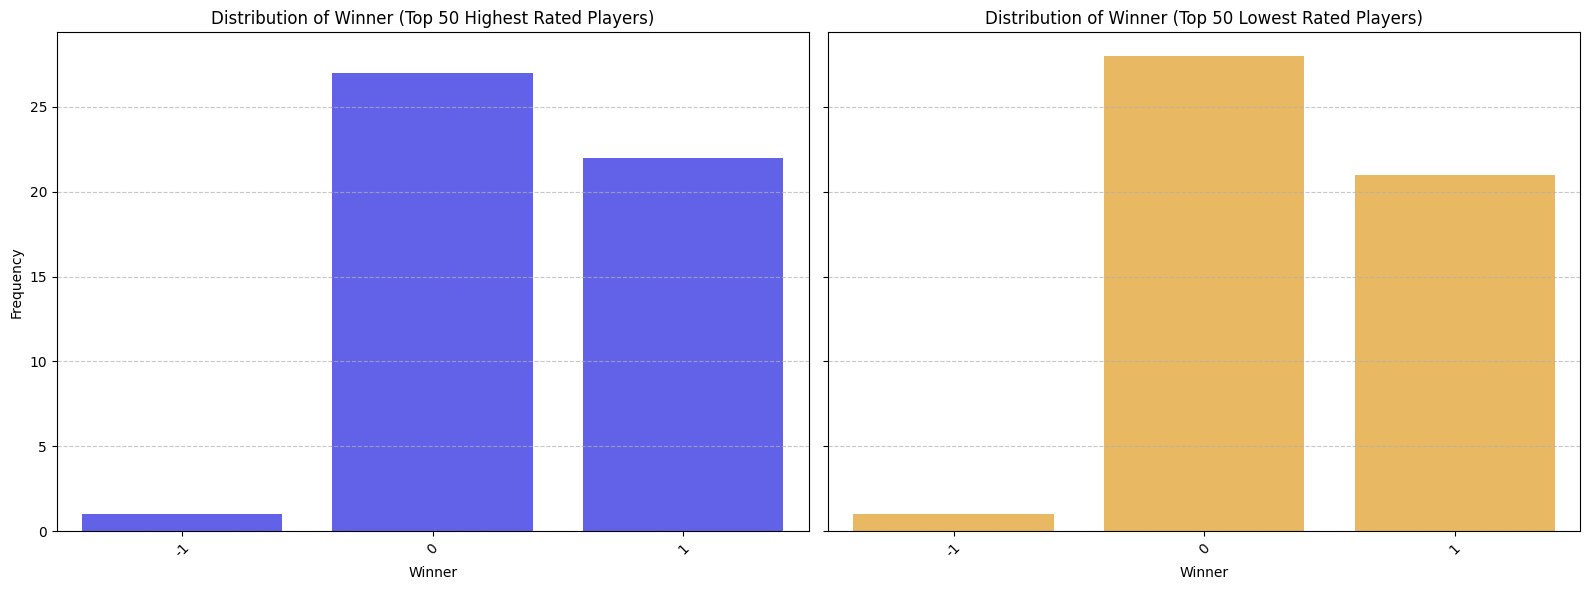

In [382]:
games_features_distribution_over_two_edges(n=50, feature_name="winner", feature_label="Winner")

### Results for top 100 highest and lowest-rated players.

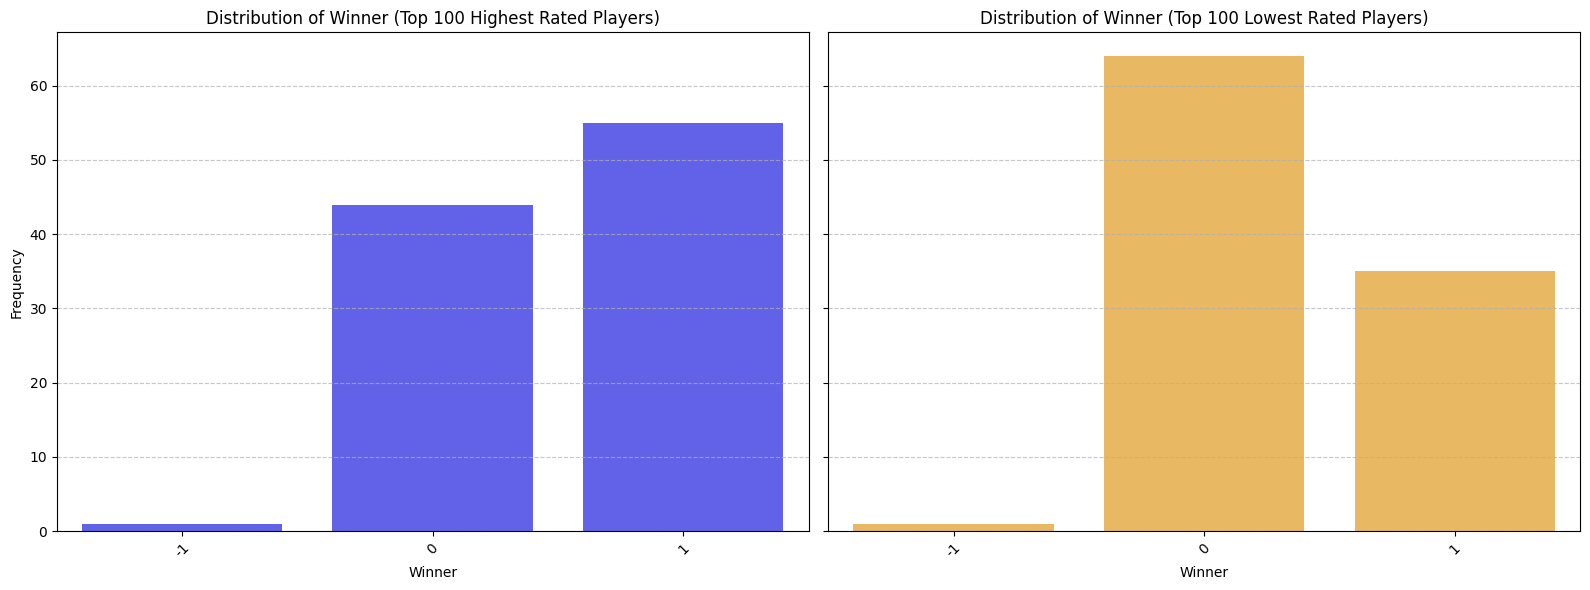

In [383]:
games_features_distribution_over_two_edges(n=100, feature_name="winner", feature_label="Winner")

### Results for top 300 highest and lowest-rated players.

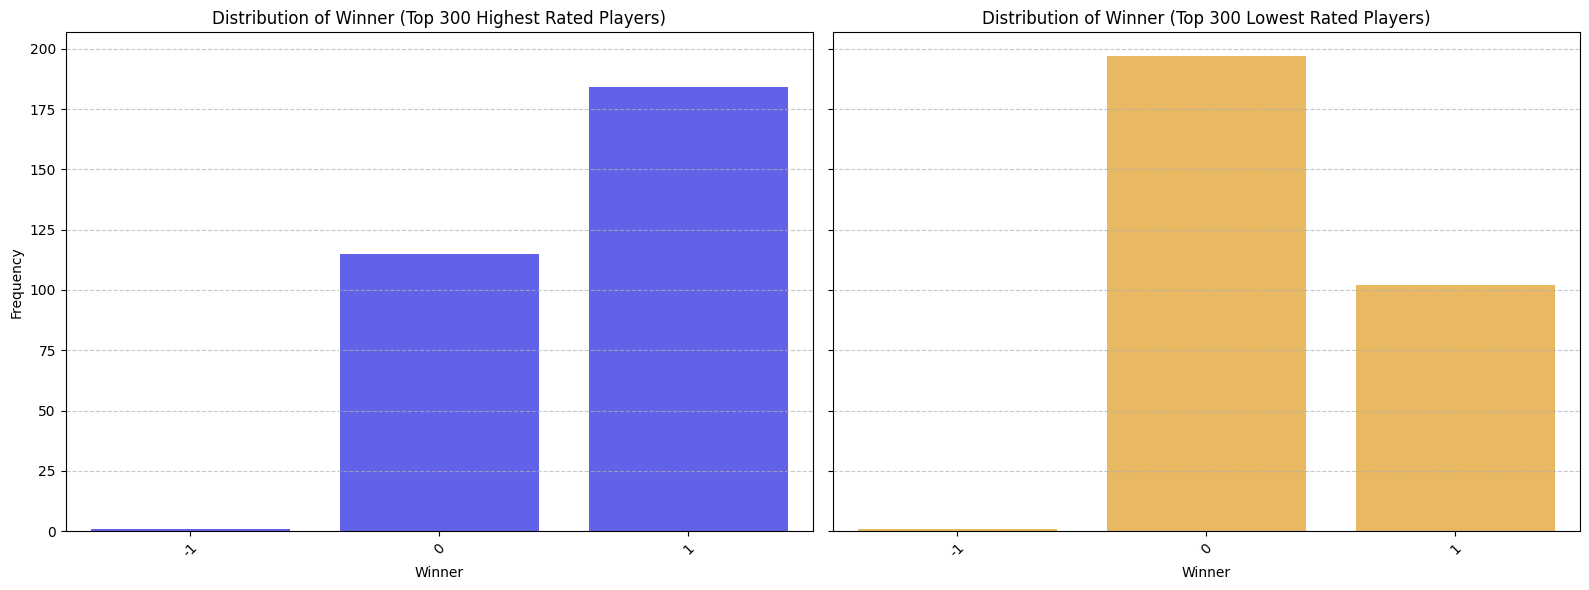

In [384]:
games_features_distribution_over_two_edges(n=300, feature_name="winner", feature_label="Winner")

### Results for top 514 highest and lowest-rated players.

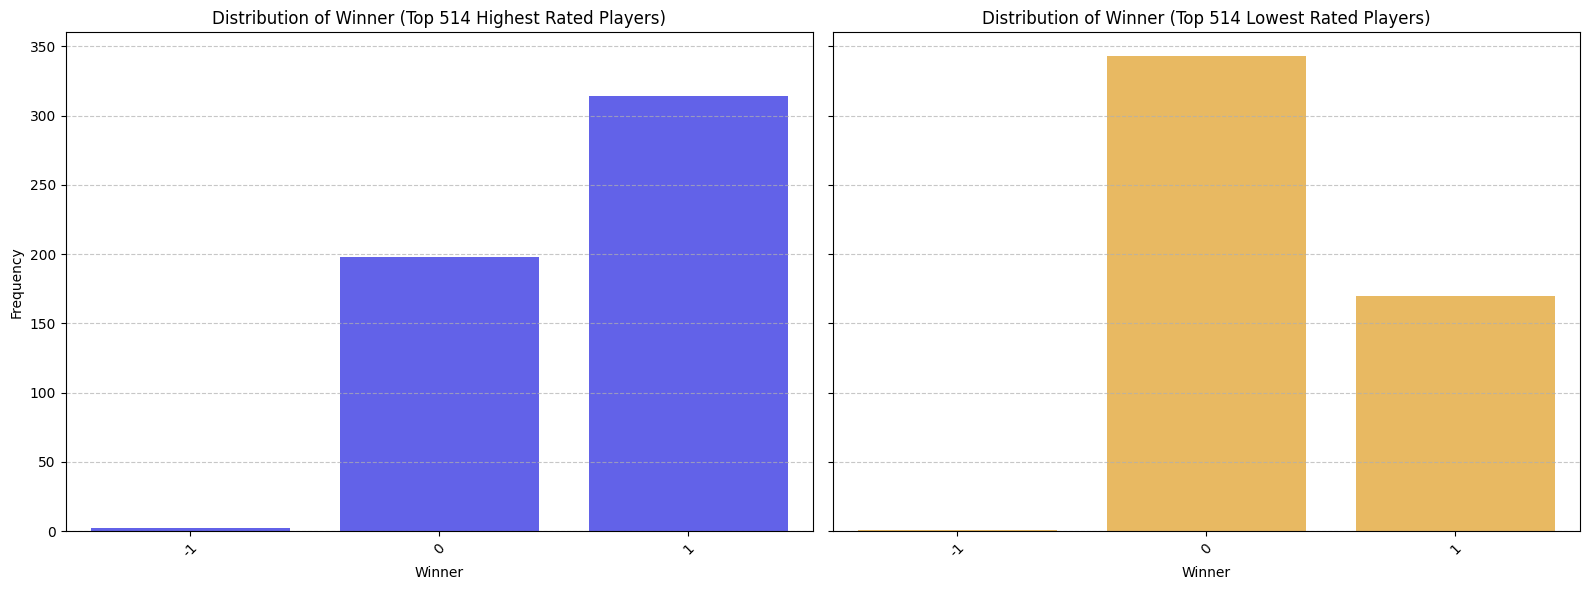

In [385]:
games_features_distribution_over_two_edges(n=514, feature_name="winner", feature_label="Winner")

### Check correlation between `winner` feature to `user_rating`

In [386]:
# Merge the games dataset with the train dataset based on game_id
merged_df = main_df.merge(games[["game_id", "winner"]], on="game_id", how="inner")

# Calculate the Pearson correlation
correlation = merged_df["winner"].corr(merged_df["user_rating"])
print(f"Correlation between winner and user_rating: {correlation:.2f}")

Correlation between winner and user_rating: 0.10


### Conclustion

As expeceted low rating users tend more to lose games - so I will keep that feature

## Investigate `increment_seconds` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

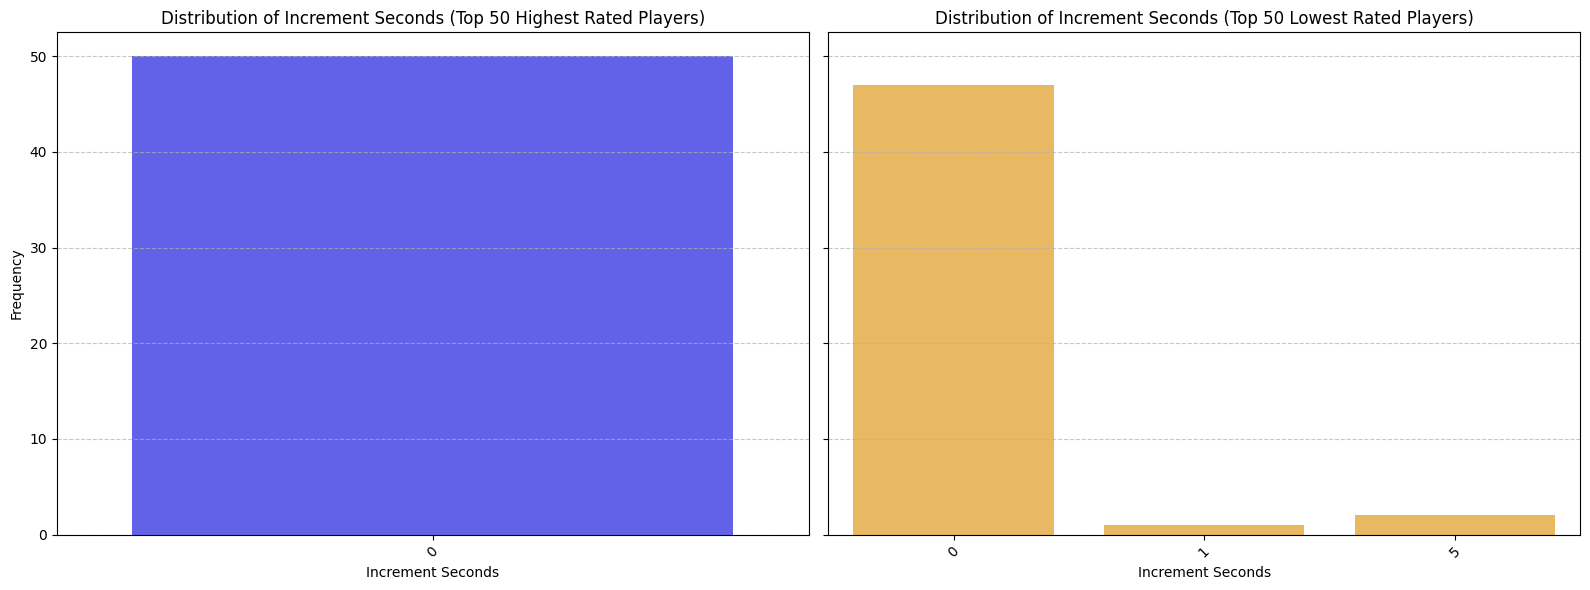

In [387]:
games_features_distribution_over_two_edges(n=50, feature_name="increment_seconds", feature_label="Increment Seconds")

### Results for top 100 highest and lowest-rated players.

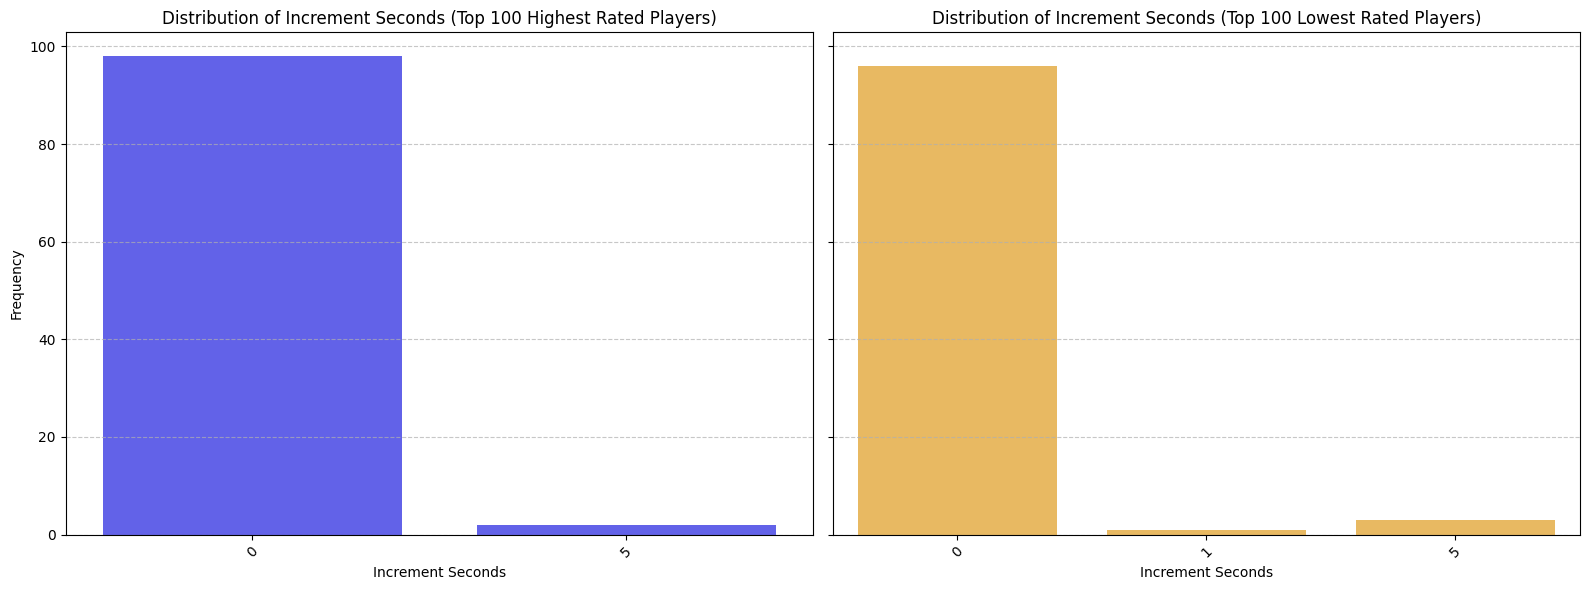

In [388]:
games_features_distribution_over_two_edges(n=100, feature_name="increment_seconds", feature_label="Increment Seconds")

### Results for top 300 highest and lowest-rated players.

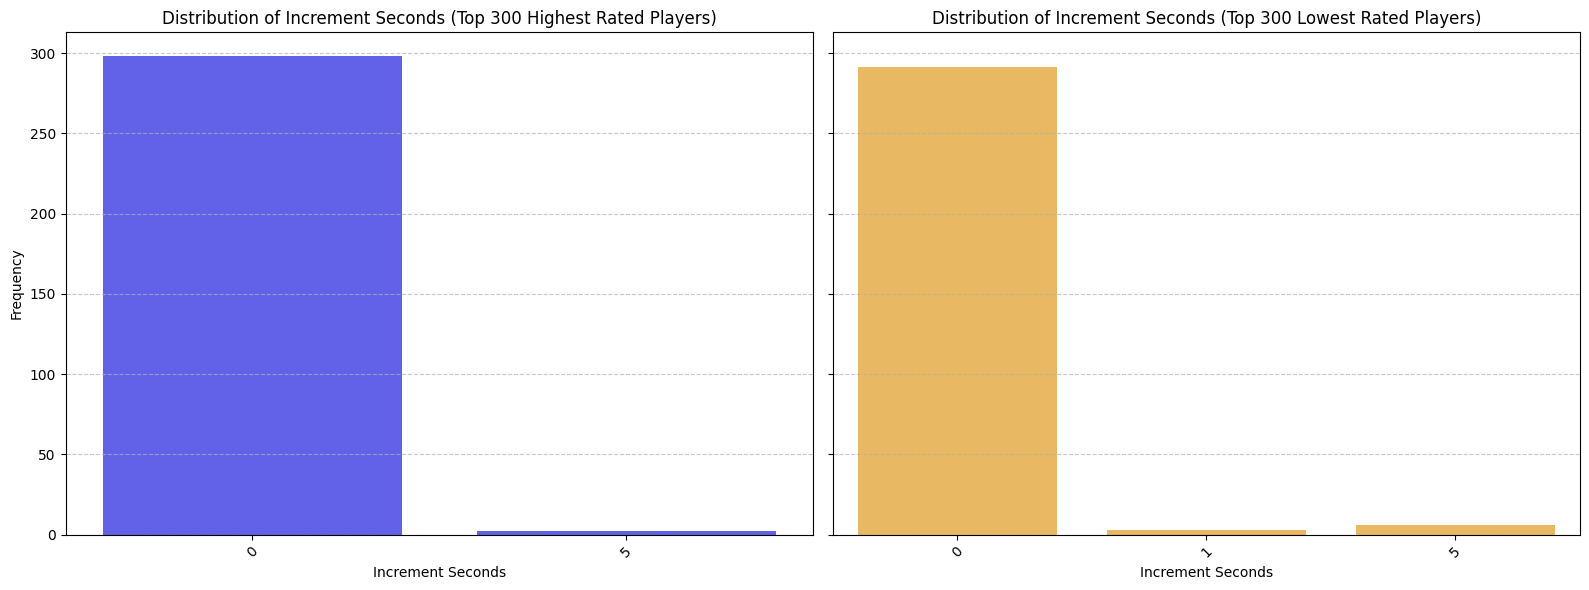

In [389]:
games_features_distribution_over_two_edges(n=300, feature_name="increment_seconds", feature_label="Increment Seconds")

### Results for top 514 highest and lowest-rated players.

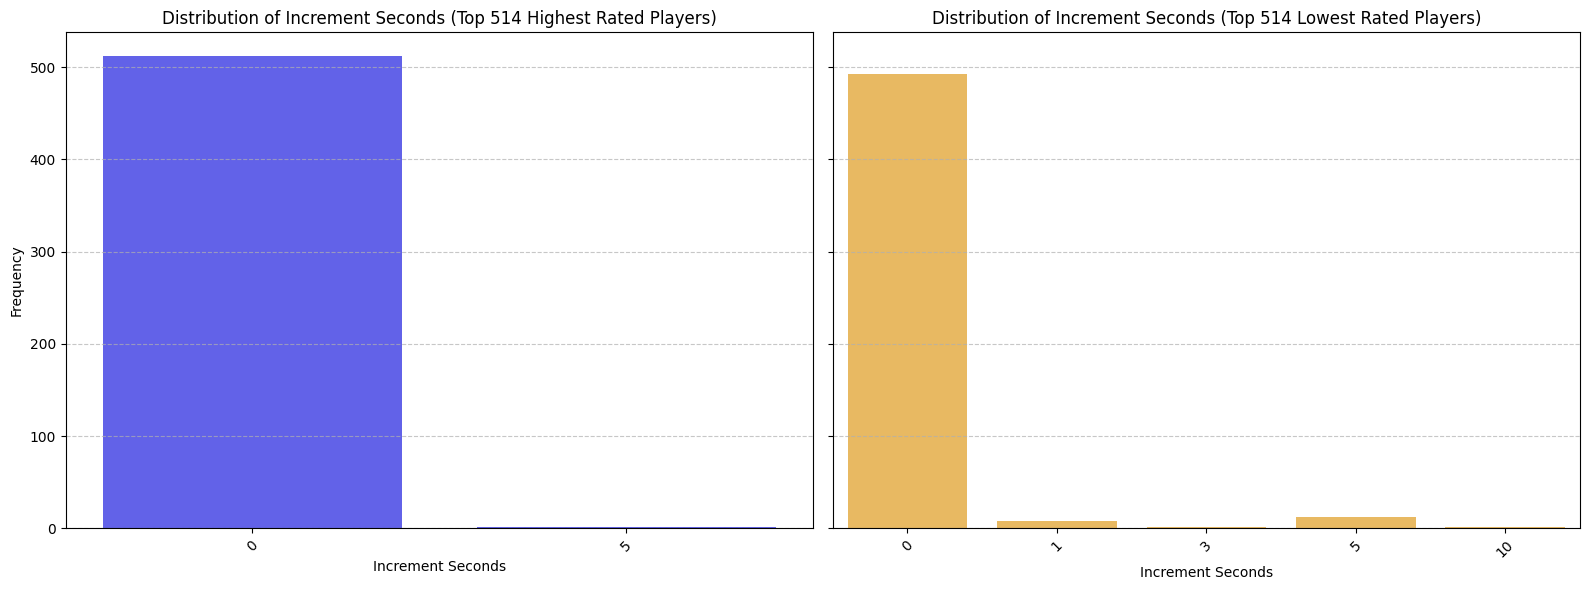

In [390]:
games_features_distribution_over_two_edges(n=514, feature_name="increment_seconds", feature_label="Increment Seconds")

### Check correlation between `increment_seconds` feature to `user_rating`

In [391]:
# Merge the games dataset with the train dataset based on game_id
merged_df = main_df.merge(games[["game_id", "increment_seconds"]], on="game_id", how="inner")

# Calculate the Pearson correlation
correlation = merged_df["increment_seconds"].corr(merged_df["user_rating"])
print(f"Correlation between increment_seconds and user_rating: {correlation:.2f}")

Correlation between increment_seconds and user_rating: 0.00


### Conclustion

Not important feature that we can drop

## Investigate `rating_mode` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

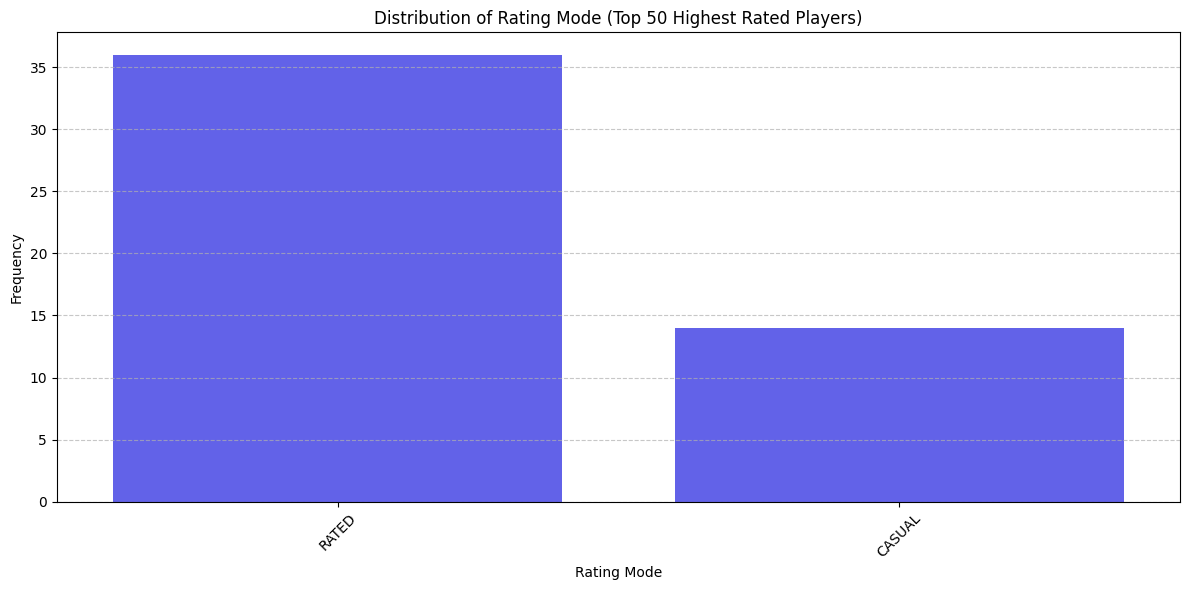

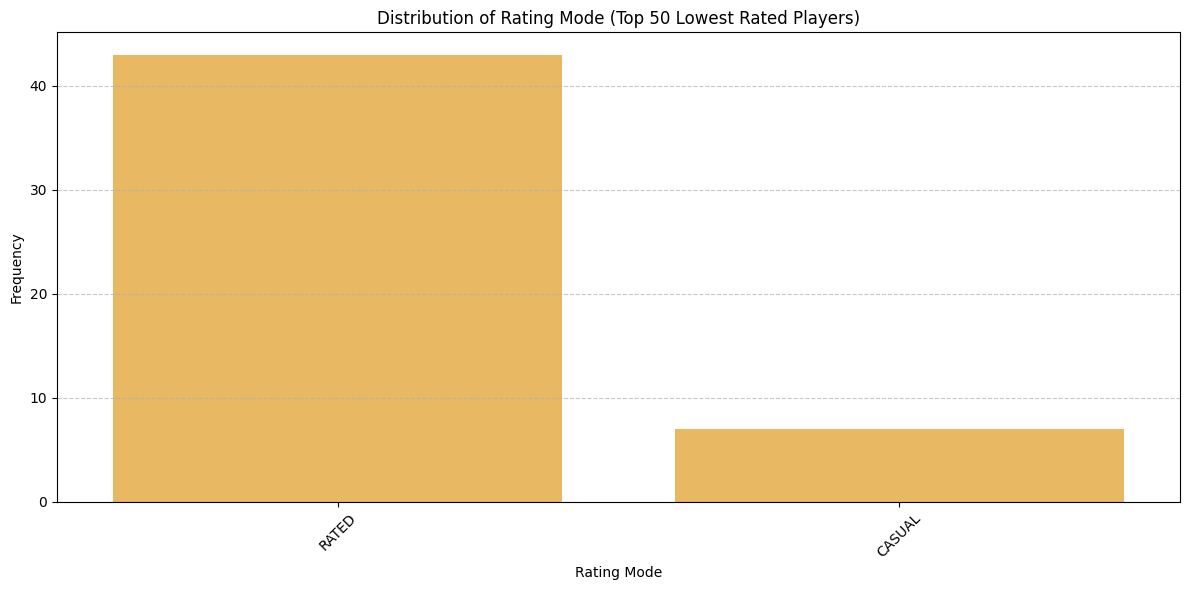

In [182]:
games_features_distribution_over_two_edges(n=50, feature_name="rating_mode", feature_label="Rating Mode")

### Results for top 100 highest and lowest-rated players.

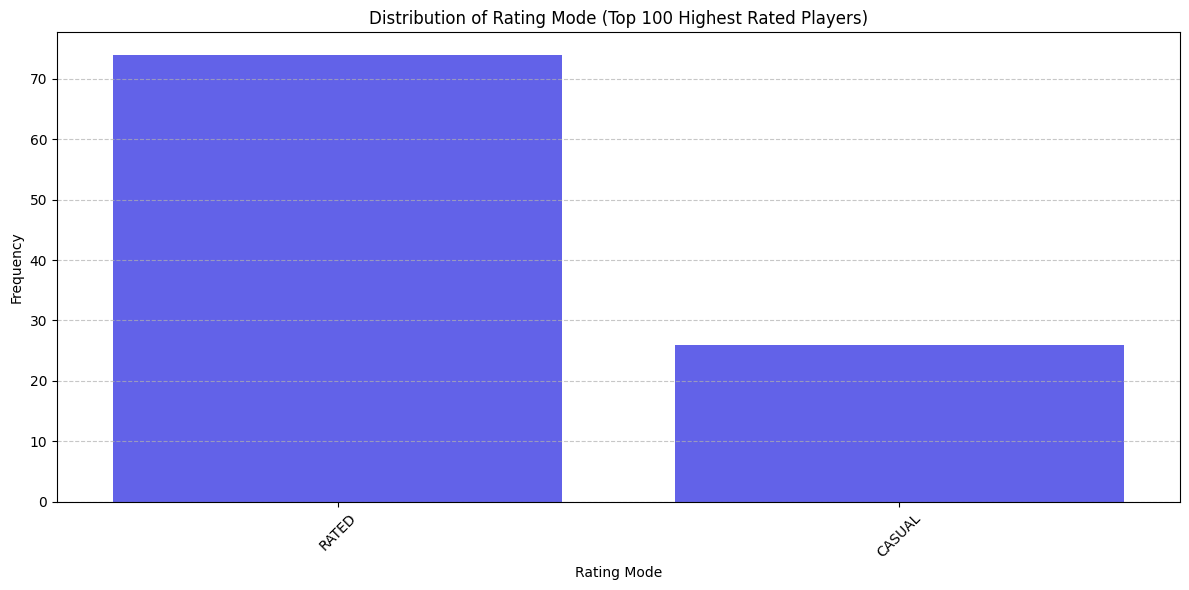

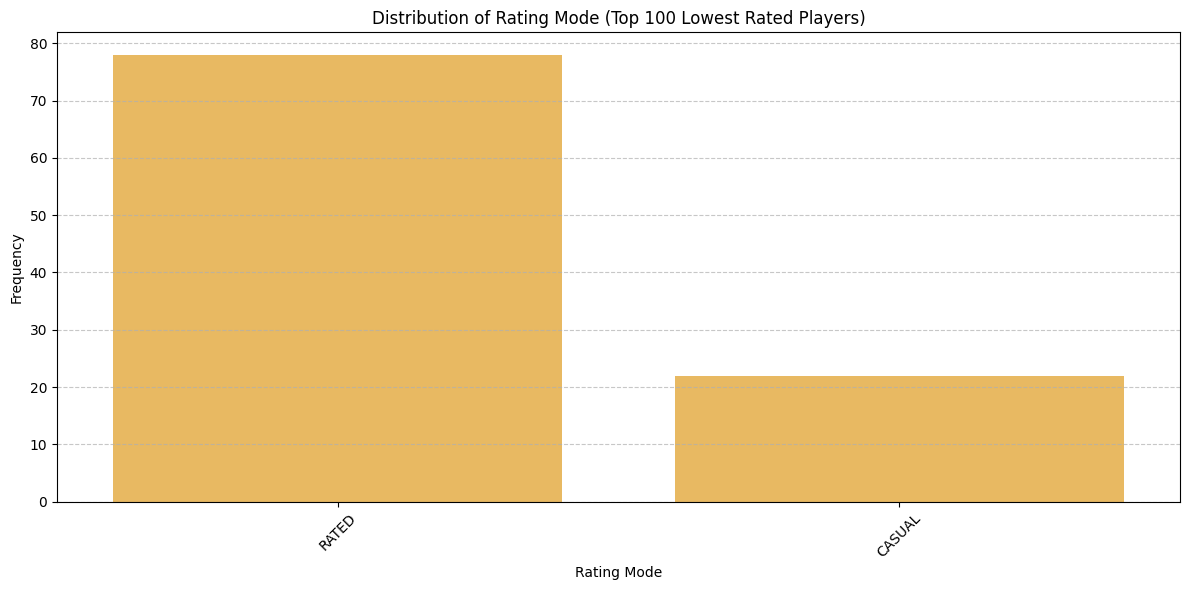

In [183]:
games_features_distribution_over_two_edges(n=100, feature_name="rating_mode", feature_label="Rating Mode")

### Results for top 300 highest and lowest-rated players.

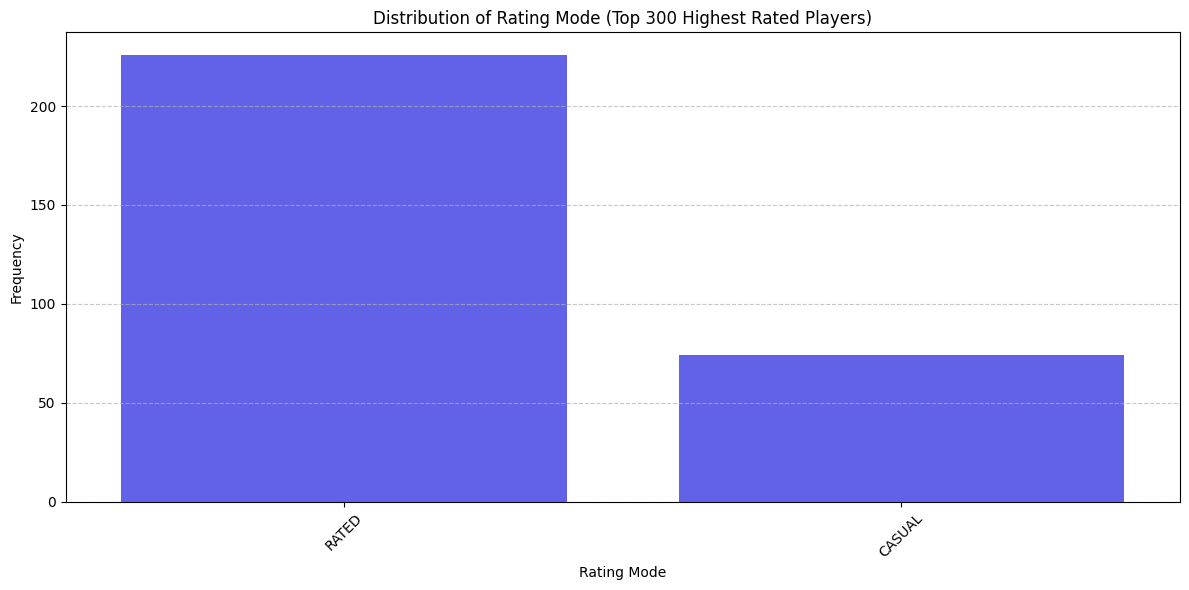

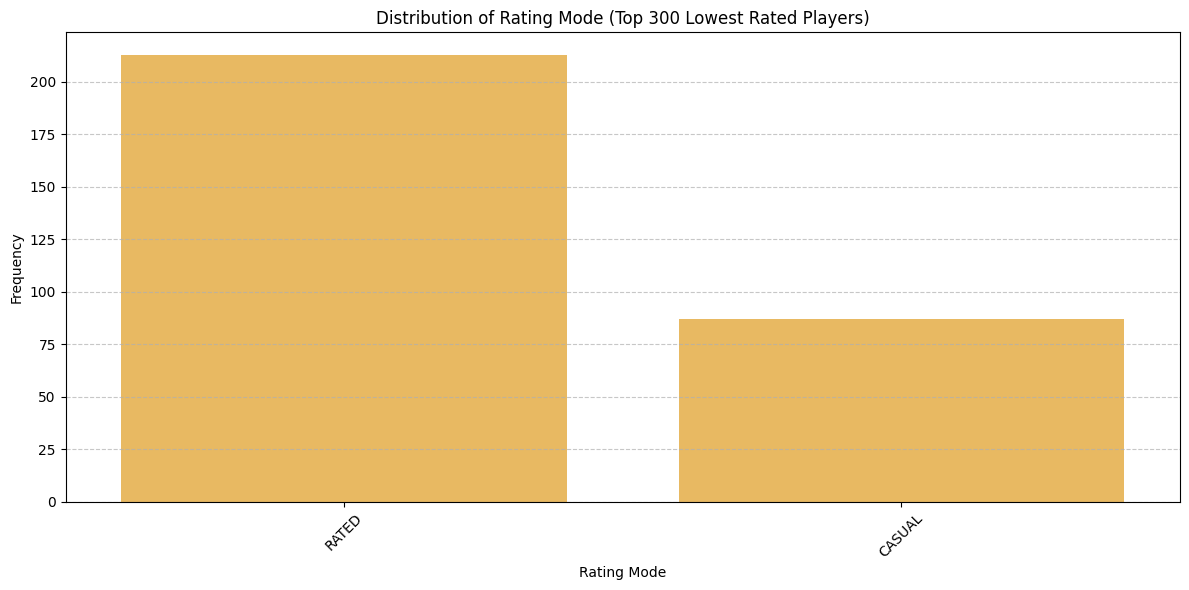

In [184]:
games_features_distribution_over_two_edges(n=300, feature_name="rating_mode", feature_label="Rating Mode")

### Results for top 514 highest and lowest-rated players.

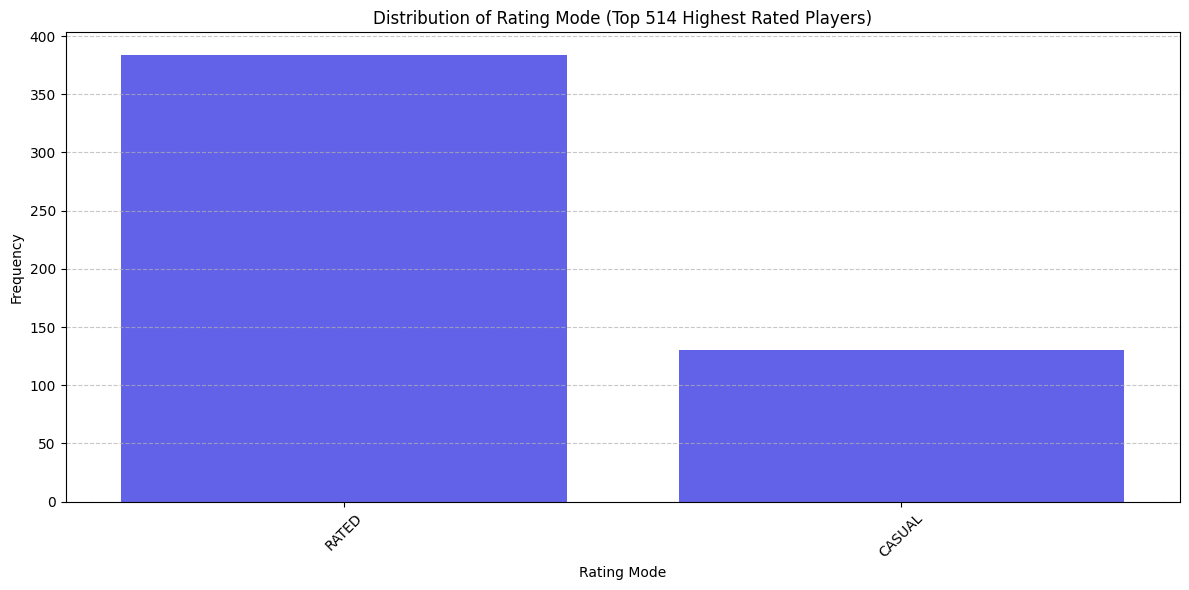

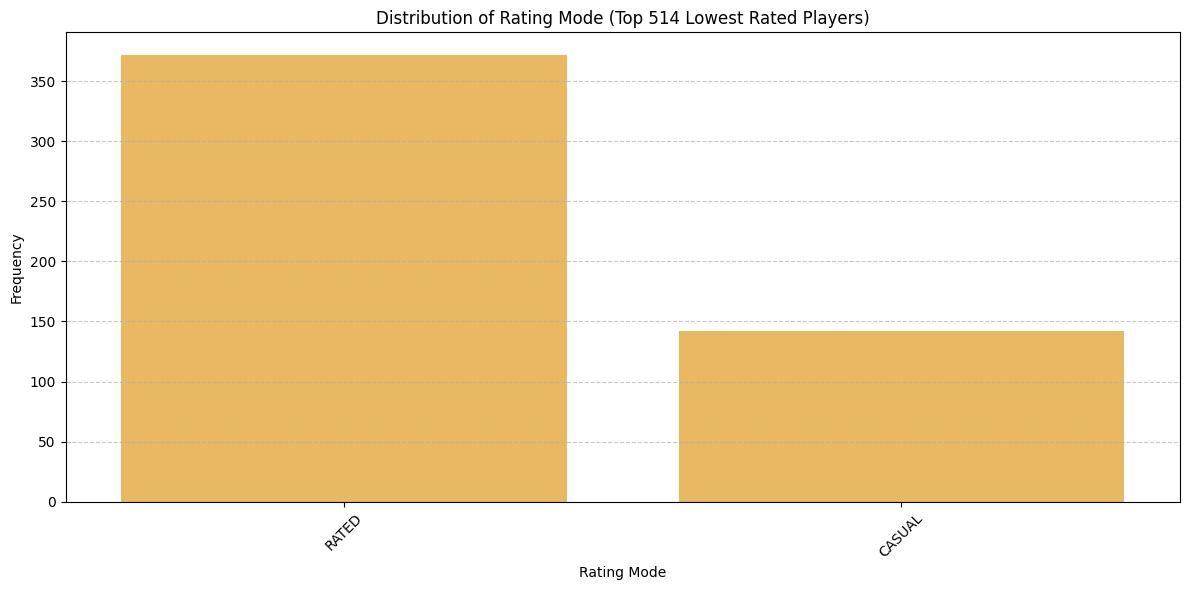

In [185]:
games_features_distribution_over_two_edges(n=514, feature_name="rating_mode", feature_label="Rating Mode")

### Conclustion

Not important feature that we can drop

## Investigate `max_overtime_minutes` in Games over different type of players rating

### Results for top 50 highest and lowest-rated players.

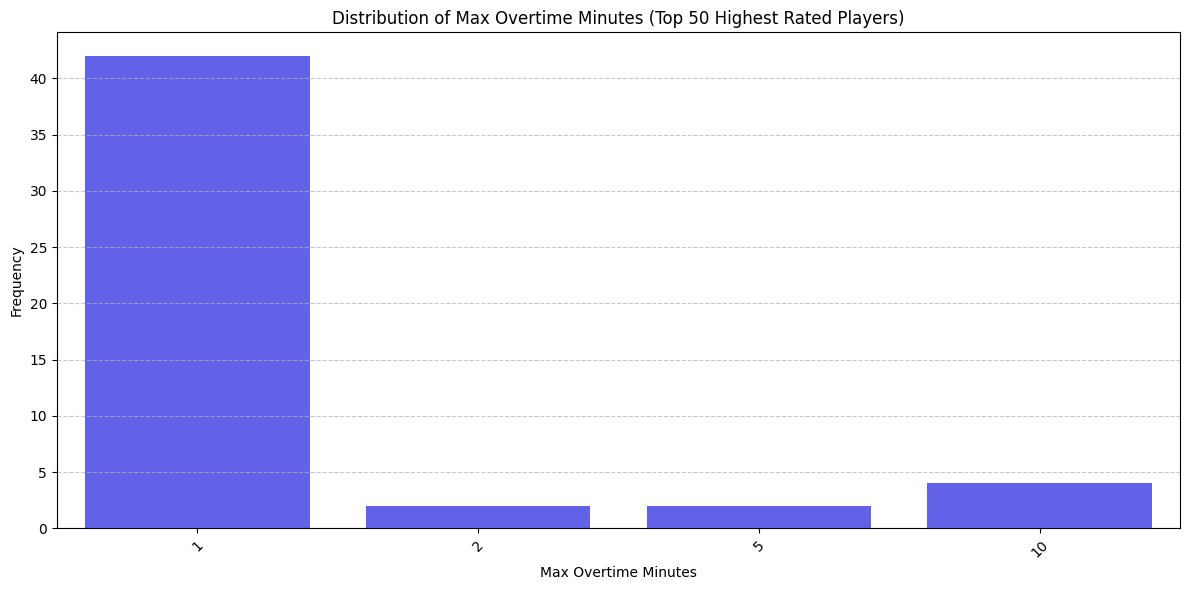

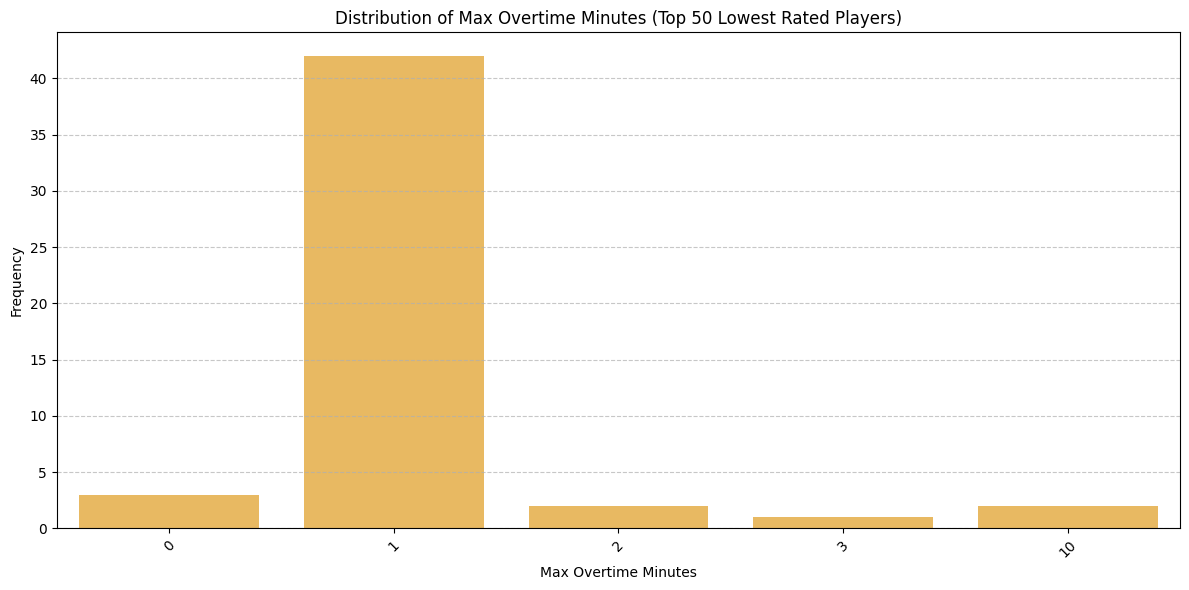

In [186]:
games_features_distribution_over_two_edges(n=50, feature_name="max_overtime_minutes", feature_label="Max Overtime Minutes")

### Results for top 100 highest and lowest-rated players.

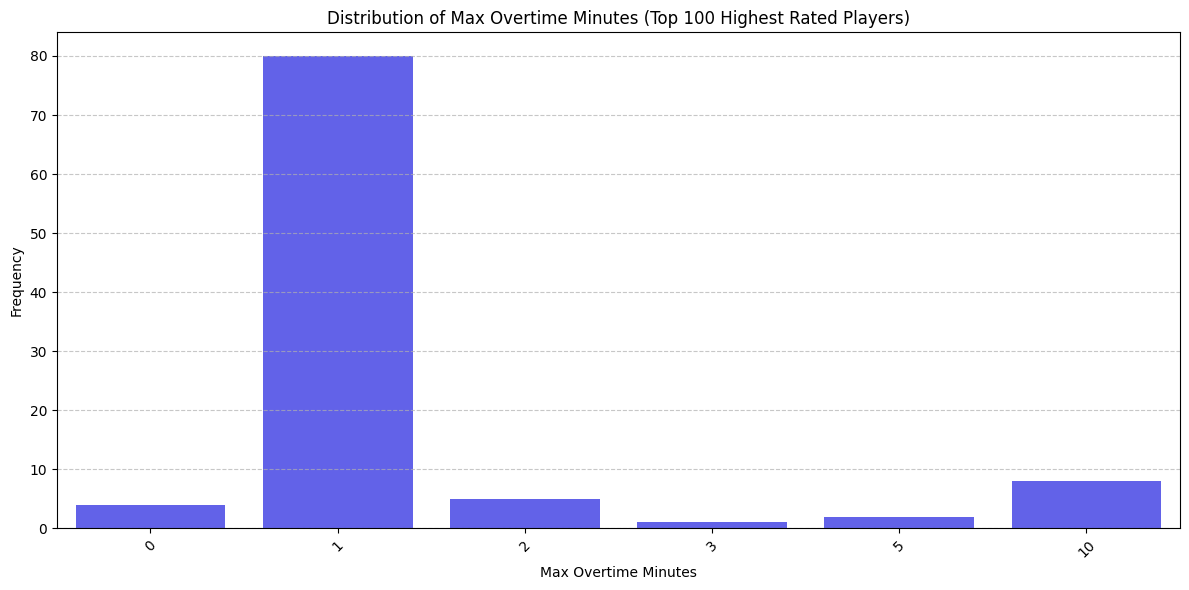

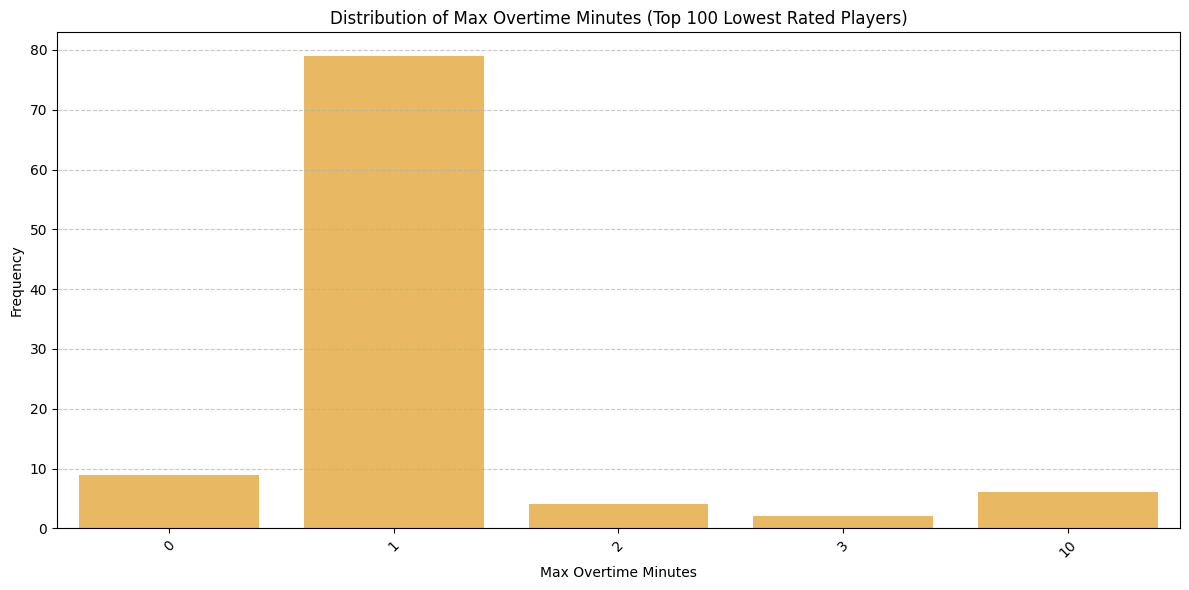

In [187]:
games_features_distribution_over_two_edges(n=100, feature_name="max_overtime_minutes", feature_label="Max Overtime Minutes")

### Results for top 300 highest and lowest-rated players.

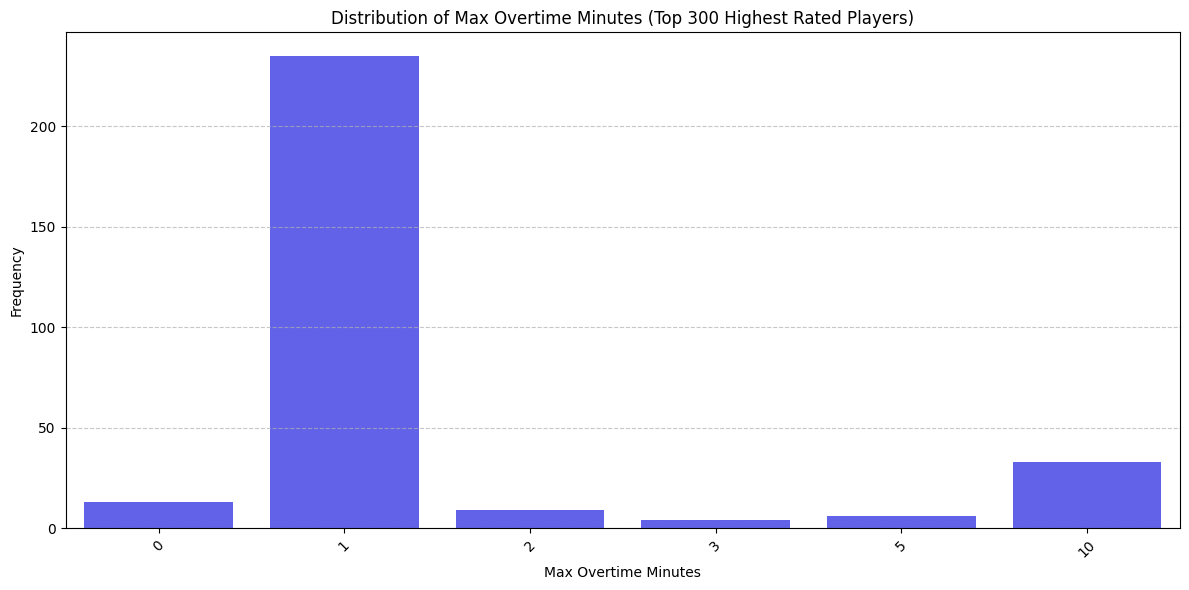

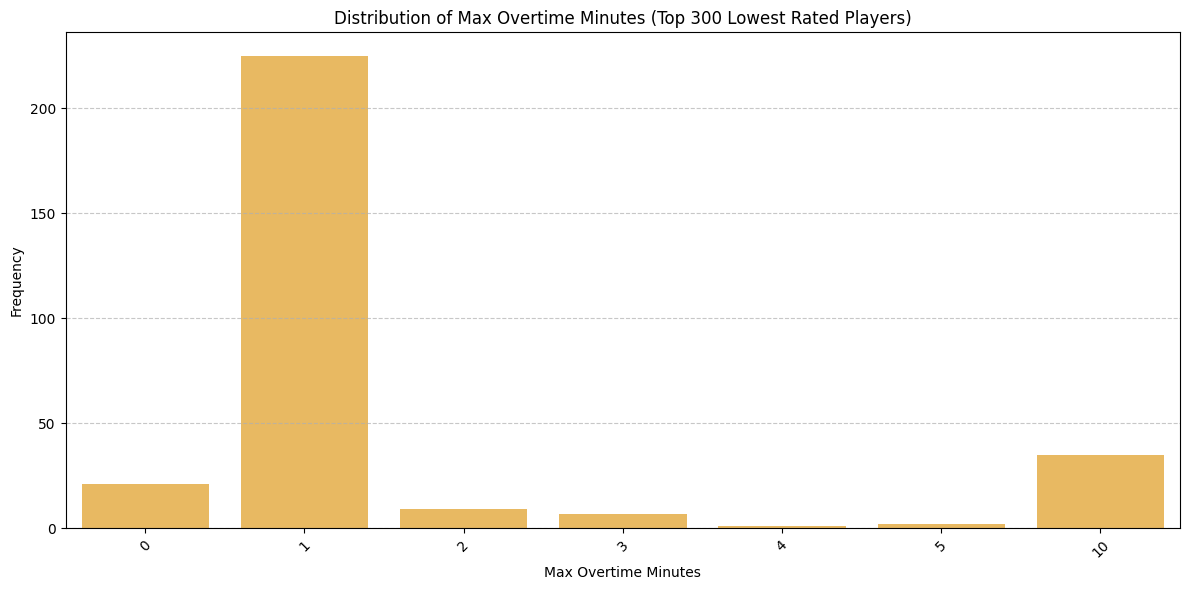

In [188]:
games_features_distribution_over_two_edges(n=300, feature_name="max_overtime_minutes", feature_label="Max Overtime Minutes")

### Results for top 514 highest and lowest-rated players.

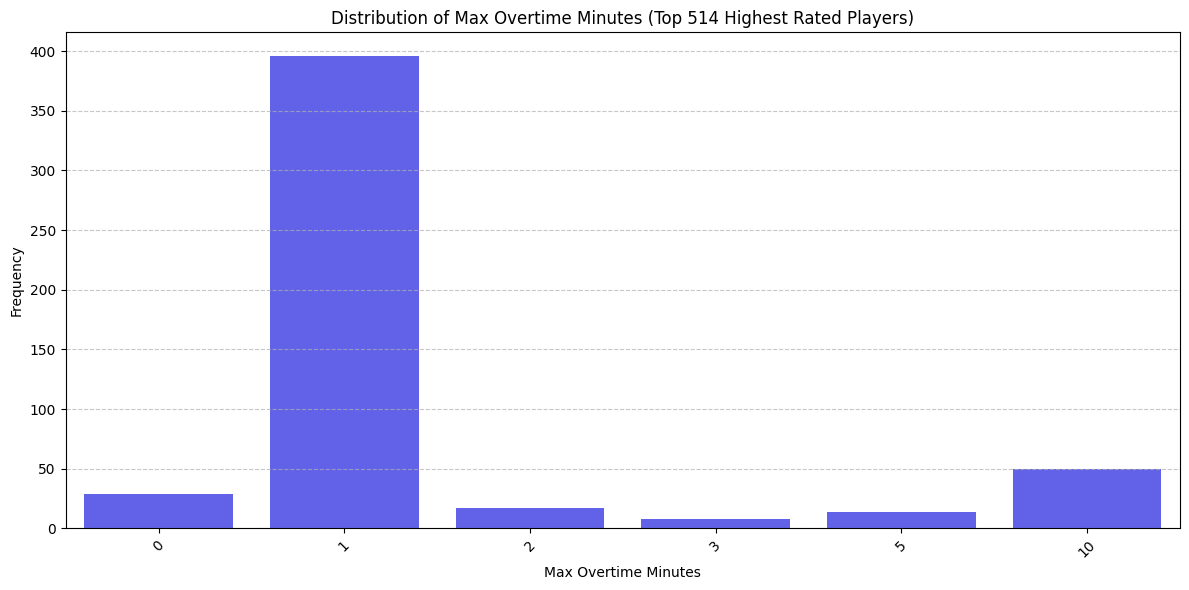

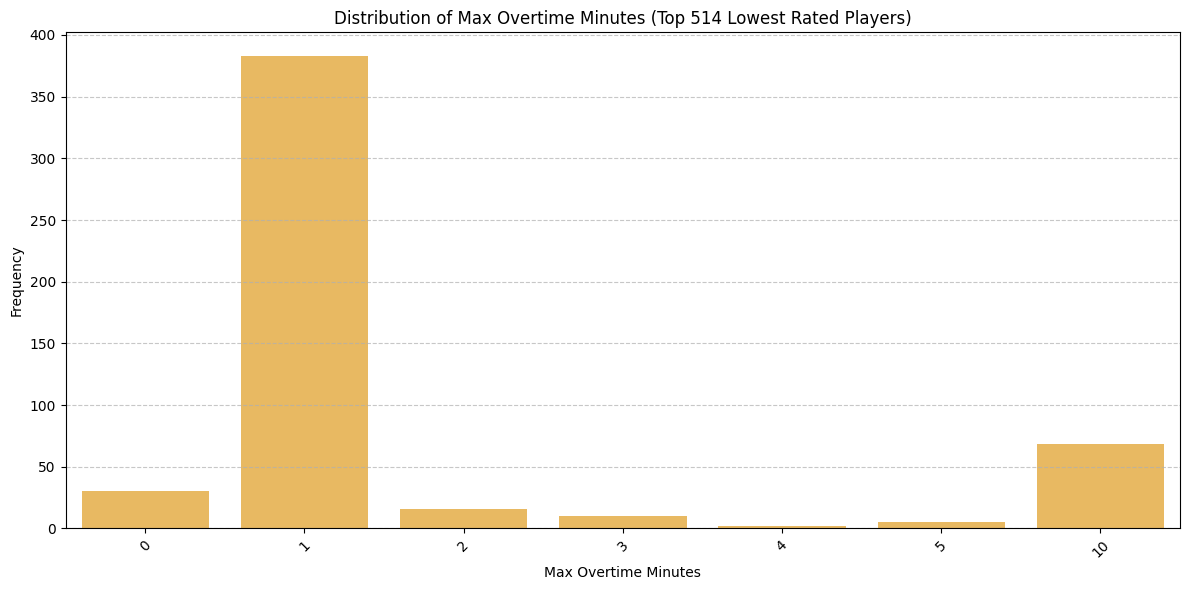

In [189]:
games_features_distribution_over_two_edges(n=514, feature_name="max_overtime_minutes", feature_label="Max Overtime Minutes")

### Conclusion

Not important feature that we can drop

## Investigate `game_duration_seconds` in Games over different type of players rating

### Define game duration distribution graph

In [207]:
def plot_game_duration_distribution(n):
    # Extract top n highest-rated players
    top_n_games = sorted_games.head(n)
    # Extract top n lowest-rated players
    bottom_n_games = sorted_games.tail(n)

    # Calculate statistics for top n players
    top_mean = top_n_games["game_duration_seconds"].mean()
    top_std = top_n_games["game_duration_seconds"].std()

    # Calculate statistics for bottom n players
    bottom_mean = bottom_n_games["game_duration_seconds"].mean()
    bottom_std = bottom_n_games["game_duration_seconds"].std()

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Plot for top n players
    sns.histplot(
        data=top_n_games,
        x="game_duration_seconds",
        kde=True,
        bins=20,
        color="blue",
        alpha=0.6,
        ax=axes[0]
    )
    axes[0].set_title(f"Top {n} Highest Rated Players")
    axes[0].set_xlabel("Game Duration (seconds)")
    axes[0].set_ylabel("Frequency")
    axes[0].grid(axis="y", linestyle="--", alpha=0.7)

    # Add statistics as text for top n players
    stats_text = f"Mean: {top_mean:.2f}\nStd: {top_std:.2f}"
    axes[0].text(
        0.95, 0.95, stats_text,
        transform=axes[0].transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.6)
    )

    # Plot for bottom n players
    sns.histplot(
        data=bottom_n_games,
        x="game_duration_seconds",
        kde=True,
        bins=20,
        color="orange",
        alpha=0.6,
        ax=axes[1]
    )
    axes[1].set_title(f"Top {n} Lowest Rated Players")
    axes[1].set_xlabel("Game Duration (seconds)")
    axes[1].grid(axis="y", linestyle="--", alpha=0.7)

    # Add statistics as text for bottom n players
    stats_text = f"Mean: {bottom_mean:.2f}\nStd: {bottom_std:.2f}"
    axes[1].text(
        0.95, 0.95, stats_text,
        transform=axes[1].transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.6)
    )

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

### Results for top 50 highest and lowest-rated players.

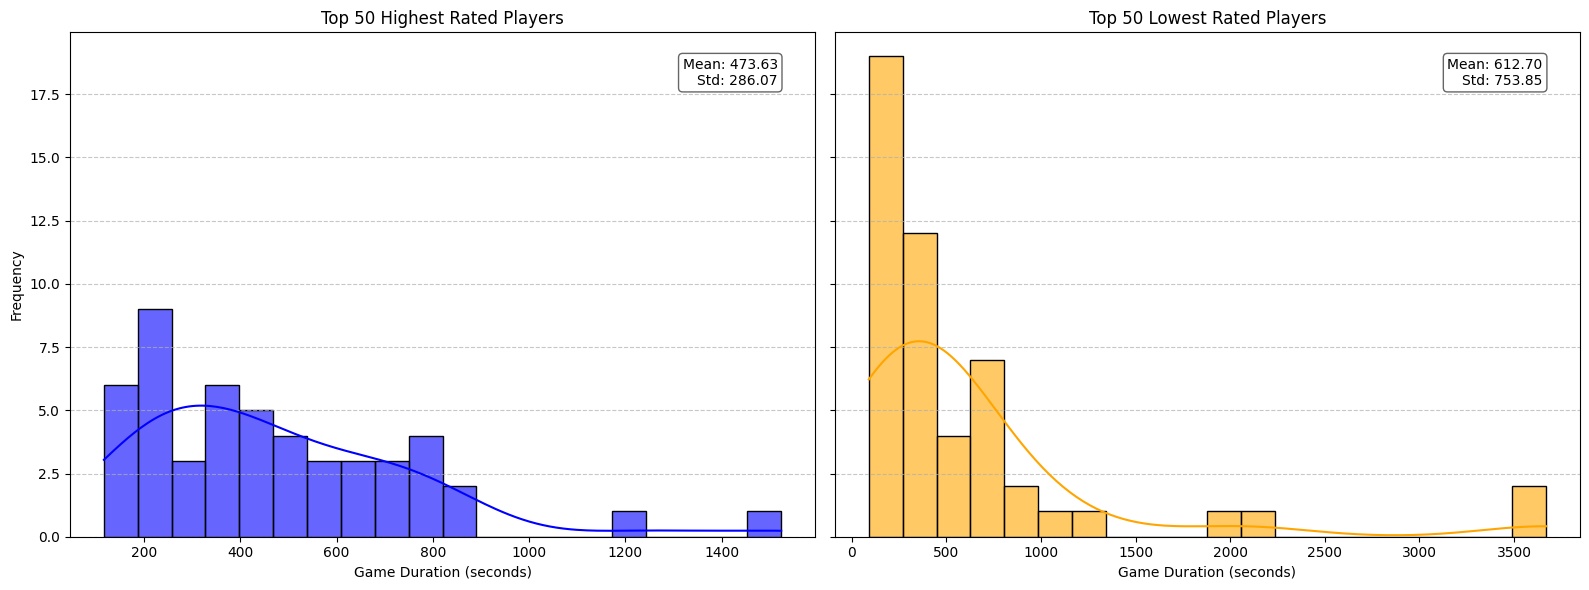

In [208]:
plot_game_duration_distribution(50)

### Results for top 100 highest and lowest-rated players.

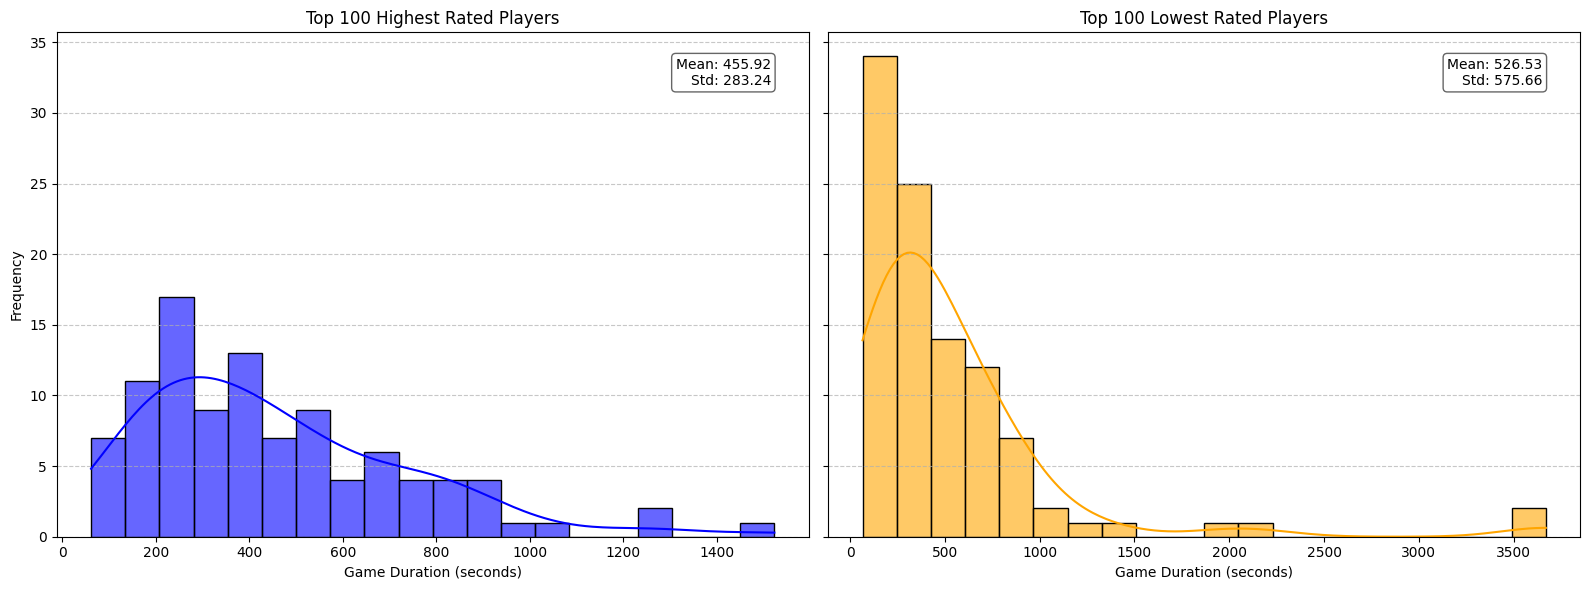

In [209]:
plot_game_duration_distribution(100)

### Results for top 300 highest and lowest-rated players.

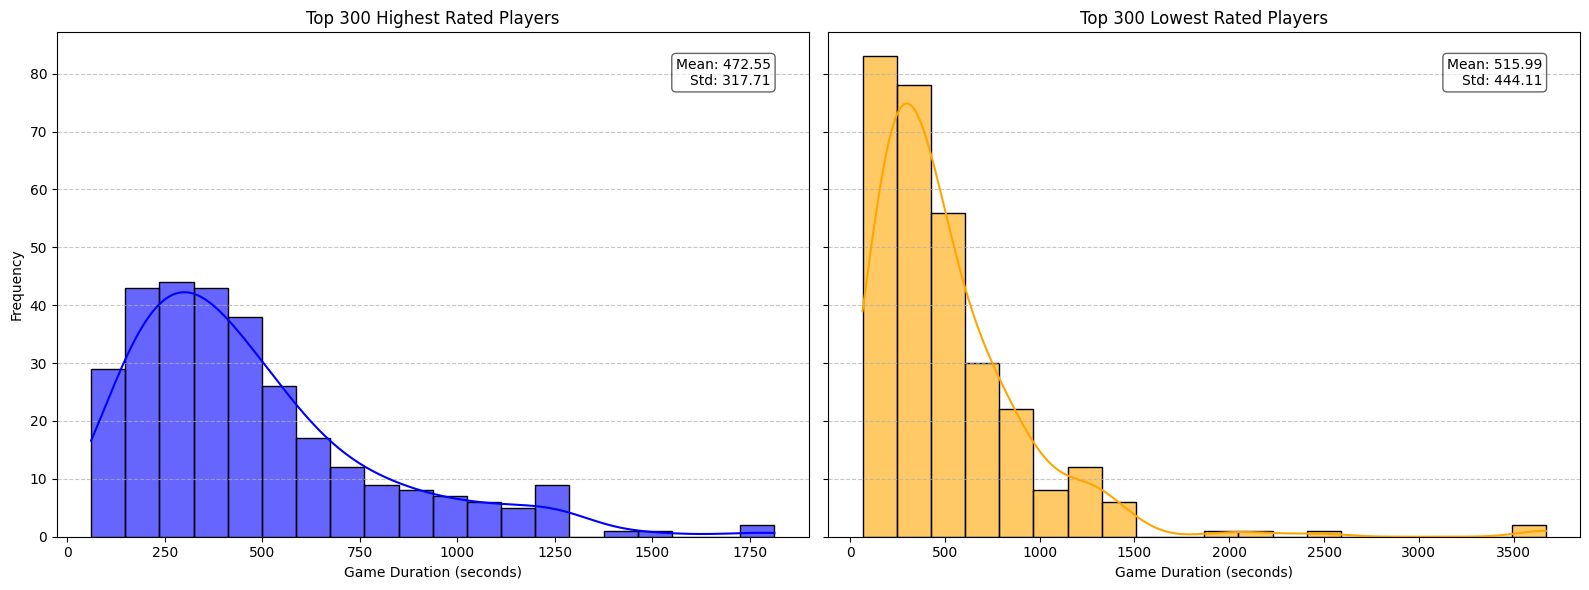

In [210]:
plot_game_duration_distribution(300)

### Results for half highest and lowest-rated players.

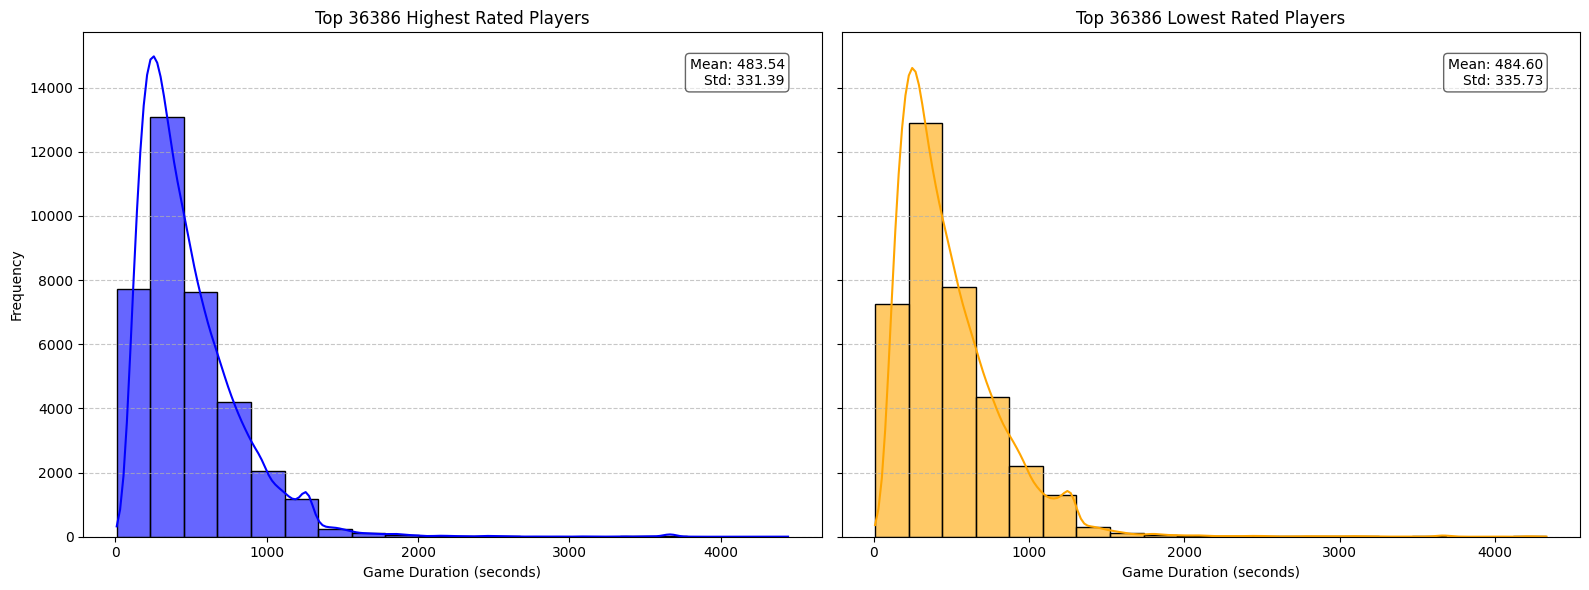

In [213]:
plot_game_duration_distribution(sorted_games.shape[0] // 2)

### Conclusion:

I decided to keep the `game_duration_seconds` feature as numeric. Modern models can learn patterns directly from numeric data, so no additional categorical features are needed.


# Games Feature Engineer 2

### add `negative_end_reason` to games df

In [378]:
games["negative_end_reason"] = games["game_end_reason"].apply(
    lambda x: 1 if x in ["RESIGNED", "TIME", "CONSECUTIVE_ZEROS"] else 0
)

# Rearrange columns
columns = [
    "game_id",
    "game_end_reason",
    "negative_end_reason",
    "winner",
    "lexicon",
    "initial_time_seconds",
    "increment_seconds",
    "rating_mode",
    "max_overtime_minutes",
    "game_duration_seconds", 
    "bot_dificulity"
]

# Reorder the train DataFrame
games = games[columns]

games.head()

,game_id,game_end_reason,negative_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,bot_dificulity
0,1,STANDARD,0,1,NWL20,1200,0,CASUAL,1,674.844274,1
1,2,STANDARD,0,1,CSW21,3600,0,RATED,1,364.214418,1
2,3,STANDARD,0,1,CSW21,900,0,RATED,5,492.268262,1
3,4,RESIGNED,1,0,CSW21,3600,0,CASUAL,1,350.861141,1
4,5,STANDARD,0,0,NWL20,1200,0,CASUAL,1,642.688722,2


### add `game_end_reason_encoded` to games df

In [380]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
games["game_end_reason_encoded"] = label_encoder.fit_transform(games["game_end_reason"].copy())

# Rearrange columns
columns = [
    "game_id",
    "game_end_reason",
    "game_end_reason_encoded",
    "negative_end_reason",
    "winner",
    "lexicon",
    "initial_time_seconds",
    "increment_seconds",
    "rating_mode",
    "max_overtime_minutes",
    "game_duration_seconds", 
    "bot_dificulity"
]

# Reorder the train DataFrame
games = games[columns]

games.head()

,game_id,game_end_reason,game_end_reason_encoded,negative_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,bot_dificulity
0,1,STANDARD,2,0,1,NWL20,1200,0,CASUAL,1,674.844274,1
1,2,STANDARD,2,0,1,CSW21,3600,0,RATED,1,364.214418,1
2,3,STANDARD,2,0,1,CSW21,900,0,RATED,5,492.268262,1
3,4,RESIGNED,1,1,0,CSW21,3600,0,CASUAL,1,350.861141,1
4,5,STANDARD,2,0,0,NWL20,1200,0,CASUAL,1,642.688722,2


### add `lexicon_encoded` to games df

In [381]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
games["lexicon_encoded"] = label_encoder.fit_transform(games["lexicon"].copy())

# Rearrange columns
columns = [
    "game_id",
    "game_end_reason",
    "game_end_reason_encoded",
    "negative_end_reason",
    "winner",
    "lexicon",
    "lexicon_encoded",
    "initial_time_seconds",
    "increment_seconds",
    "rating_mode",
    "max_overtime_minutes",
    "game_duration_seconds", 
    "bot_dificulity"
]

# Reorder the train DataFrame
games = games[columns]

games.head()

,game_id,game_end_reason,game_end_reason_encoded,negative_end_reason,winner,lexicon,lexicon_encoded,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,bot_dificulity
0,1,STANDARD,2,0,1,NWL20,3,1200,0,CASUAL,1,674.844274,1
1,2,STANDARD,2,0,1,CSW21,0,3600,0,RATED,1,364.214418,1
2,3,STANDARD,2,0,1,CSW21,0,900,0,RATED,5,492.268262,1
3,4,RESIGNED,1,1,0,CSW21,0,3600,0,CASUAL,1,350.861141,1
4,5,STANDARD,2,0,0,NWL20,3,1200,0,CASUAL,1,642.688722,2


# Clean Games Dataset

In [393]:
# col2drop = ["time_control_name", "increment_seconds", "first", "created_at", "rating_mode", "max_overtime_minutes"]
# games = games.drop(columns=[col for col in col2drop if col in games.columns])

# Look into Turns dataset - try some aggregations 

## 1. Consistency in Scoring - Calculate the standard deviation of points scored over the three turns

### Define analyze_std_points_scored Method

In [247]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
def analyze_std_points_scored(n, window_size):
    # Randomly select one game_id from the top n highest-ranked players
    top_n_highest_games = sorted_games.head(n)
    top_highest_game_id = random.choice(top_n_highest_games["game_id"].unique())

    # Randomly select one game_id from the top n lowest-ranked players
    top_n_lowest_games = sorted_games.tail(n)
    top_lowest_game_id = random.choice(top_n_lowest_games["game_id"].unique())

    # Filter turns for the selected game_ids
    top_highest_turns = turns[turns["game_id"] == top_highest_game_id].copy()
    top_lowest_turns = turns[turns["game_id"] == top_lowest_game_id].copy()

    # Group turns by nickname and calculate rolling standard deviation for each player
    top_highest_turns["std_points_scored"] = (
        top_highest_turns.groupby("nickname")["points"]
        .rolling(window=window_size)
        .std()
        .reset_index(0, drop=True)
    )

    top_lowest_turns["std_points_scored"] = (
        top_lowest_turns.groupby("nickname")["points"]
        .rolling(window=window_size)
        .std()
        .reset_index(0, drop=True)
    )

    # Plot the feature behavior for the high-ranked human players
    plt.figure(figsize=(12, 6))
    for nickname in top_highest_turns["nickname"].unique():
        if nickname not in bots_and_scores.keys():  # Exclude bot names
            player_turns = top_highest_turns[top_highest_turns["nickname"] == nickname]
            # Calculate mean std
            mean_std = player_turns["std_points_scored"].mean()
            plt.plot(
                player_turns["turn_number"],
                player_turns["std_points_scored"],
                label=f"High-Ranked ({nickname}, Mean: {mean_std:.2f})",
                marker="o",
                linestyle="-"
            )

    # Plot the feature behavior for the low-ranked human players
    for nickname in top_lowest_turns["nickname"].unique():
        if nickname not in bots_and_scores.keys():  # Exclude bot names
            player_turns = top_lowest_turns[top_lowest_turns["nickname"] == nickname]
            # Calculate mean std
            mean_std = player_turns["std_points_scored"].mean()
            plt.plot(
                player_turns["turn_number"],
                player_turns["std_points_scored"],
                label=f"Low-Ranked ({nickname}, Mean: {mean_std:.2f})",
                marker="o",
                linestyle="-"
            )

    # Customize the plot
    plt.title(f"Rolling Standard Deviation of Points Scored (Window: {window_size} Turns) - Top {n}")
    plt.xlabel("Turn Number")
    plt.ylabel("Standard Deviation of Points Scored")
    plt.legend(title="Player Information")
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()


### Tests

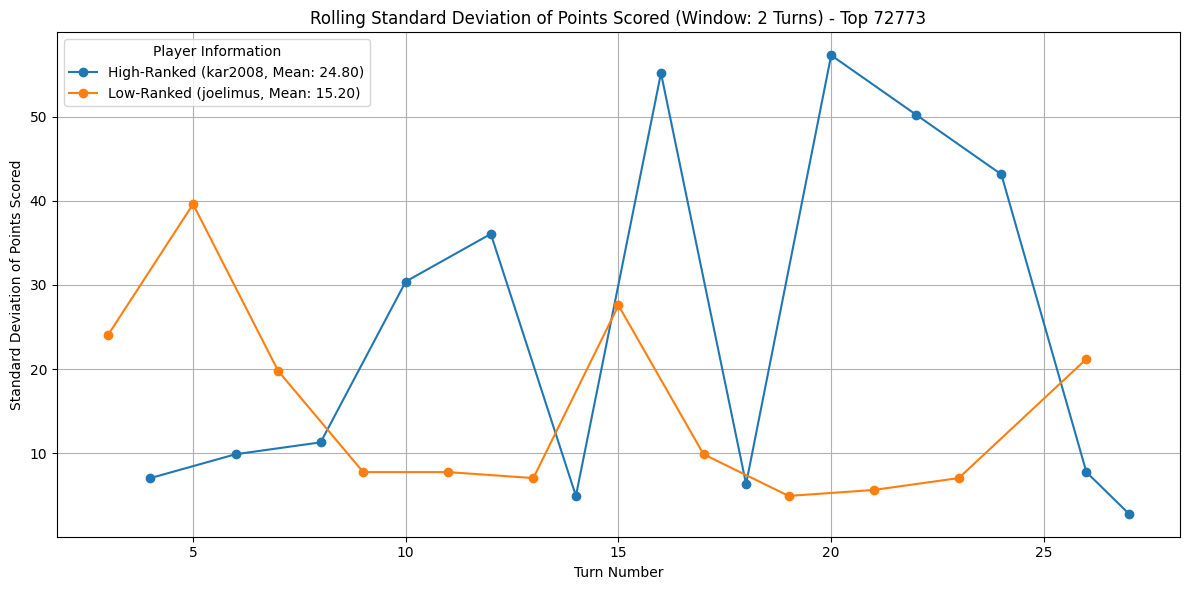

In [282]:
analyze_std_points_scored(n=games.shape[0], window_size=2)

### Conclustion

Not a strong aggregation

# Summarise datasets I got

## Turns

In [275]:
display(turns.head(29))

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,rack_len,rack_usage,letter_score,average_letter_score
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play,7.0,0.428571,5,1.666667
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play,7.0,0.428571,8,2.666667
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play,7.0,0.571429,4,1.000000
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play,7.0,0.285714,4,2.000000
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play,7.0,1.142857,9,1.125000
5,1,6,stevy,EEOORSX,M11,OXO,31,65,Play,7.0,0.428571,10,3.333333
6,1,7,BetterBot,AAEJRSU,5E,RAJAS,29,83,Play,7.0,0.714286,12,2.400000
7,1,8,stevy,AEEFIRS,9B,FAERIES,72,137,Play,7.0,1.000000,10,1.428571
8,1,9,BetterBot,ELNNORU,C3,NEURON.L,68,151,Play,7.0,1.142857,7,0.875000
9,1,10,stevy,EEEHIKO,6F,HO,35,172,Play,7.0,0.285714,5,2.500000


## Train

In [276]:
display(train.head())

,game_id,bot_name,bot_score,bot_mean_rack_usage,bot_rating,user_name,user_score,user_mean_rack_usage,mean_average_letter_score,user_rating
0,1,BetterBot,335,0.700549,1637,stevy,429,0.573469,1.636905,1500
1,3,BetterBot,318,0.626374,2071,davidavid,440,0.591837,1.951531,1811
2,4,BetterBot,478,0.723810,1936,Inandoutworker,119,0.418367,1.202381,1473
3,5,STEEBot,427,0.659524,1844,stevy,325,0.511161,2.300000,1500
4,6,STEEBot,427,0.934066,2143,HivinD,378,0.678571,1.655556,2029


## Games

In [277]:
display(games.head())

,game_id,game_end_reason,game_end_reason_encoded,negative_end_reason,winner,initial_time_seconds,game_duration_seconds,bot_dificulity
0,1,STANDARD,2,0,1,1200,674.844274,1
1,2,STANDARD,2,0,1,3600,364.214418,1
2,3,STANDARD,2,0,1,900,492.268262,1
3,4,RESIGNED,1,1,0,3600,350.861141,1
4,5,STANDARD,2,0,0,1200,642.688722,2


# Create the Final Dataframes

## Final Train 

In [228]:
f_train_df = train.copy()

In [229]:
f_train_df = f_train_df.merge(games, on="game_id", how="inner")

columns_order = ["game_id", 
                 "bot_name",
                 "user_name",
                  "bot_mean_rack_usage",
                 "game_end_reason",
                 "game_end_reason_encoded",
                 "negative_end_reason",
                 "initial_time_seconds",
                 "game_duration_seconds",
                 "bot_dificulity",
                 "bot_score",
                 "bot_rating",
                 "user_mean_rack_usage",
                 "mean_average_letter_score",
                 "winner",
                 "user_score",
                 "user_rating"]

f_train_df = f_train_df[columns_order]
f_train_df = f_train_df.drop(columns=["bot_name", "user_name", "bot_mean_rack_usage", "game_end_reason"])

In [1]:
f_train_df.head()

NameError: name 'f_train_df' is not defined

In [233]:
src_train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473
